# Effectuez une prédiction de revenus

### Mission 4

- nous chercherons à expliquer le revenu des individus en fonction de plusieurs variables explicatives : le pays de l'individu, l'indice de Gini de ce pays, la classe de revenus des parents, etc.

> Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. 
     >- analysez la performance du modèle
    
> Pour chacune des régressions suivantes, vous testerez 2 versions : 
    >- l'une en exprimant le revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln)
    >- l'autre en les laissant tels quels. Vous choisirez la version la plus performante pour répondre aux questions
    
- appliquez une régression linéaire sur vos données, en n’incluant comme variables explicatives uniquement le **revenu moyen du pays de l’individu** et l’**indice de Gini du pays de l’individu**.
    - quel est le pourcentage de variance expliquée par votre modèle ?
        - selon ce modèle, donnez la décomposition de variance totale expliquée par :
            - le pays de naissance (ie. le revenu moyen et l’indice de Gini)
            - les autres facteurs non considérés dans le modèle (efforts, chance, etc...)
            
            
- améliorez le modèle précédent en **incluant** maintenant la **classe de revenu des parents**.
    - quel est le pourcentage de variance expliquée par ce nouveau modèle ?
    - en observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?
        - selon ce dernier modèle, donnez la décomposition de variance totale expliquée par :
            - le pays de naissance et le revenu des parents
            - les autres facteurs non considérés dans le modèle (efforts, chance, etc.)


## Sommaire
- [importation des librairies](#librairies)
- [importation et lecture des données](#donnees)
- [calcul du revenu moyen du pays et des revenus (parents & enfants) en logarithme (ln)](#ln_income)
- [Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le **pays de l’individu** ](#anova)
    - [visualisation de la normalité (ou non) des données](#vis_donnees)
    - [anova "manuelle"](#anova_manuelle)
    - [test ANOVA sans log](#test_anova)
        - [Tukey HSD test](#tukey)
    - [ANOVA avec log](#anova_ln_income)
- [pour chacune des régressions suivantes, vous testerez 2 versions sans et avec log](#reg)
    - [sans log : variables explicatives : le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu](#sans_log_gj)
        - [test de la normalité des résidus](#sans_log_norm_res)
        - [points atypiques](#sans_log_pts_atyp)
    - [avec log : variables explicatives : log du revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu](#log_mj_gj)
        - [normalité des résidus](#log_norm_res)
- [améliorez le modèle précédent en incluant maintenant la classe de revenu des parents. Quel est le pourcentage de variance expliquée par ce nouveau modèle ? ](#cparents)
    - [régression sans log](#sans_log_parents)
        - [recherche des points atypiques](#sans_log_atyp_cp)
        - [colinéarité des variables](#sans_log_colin)
        - [variance des résidus](#sans_log_var_res)
        - [normalité des résidus](#sans_log_norm_res_cp)
    - [régression avec log](#log_reg_cp)
        - [recherche des points atypiques](#log_pts_aty_cp)
        - [colinéarité des variables](#log_colin_cp)
        - [variance des résidus](#log_var_res_cp)
        - [normalité des résidus](#log_norm_res_cp)
- [en observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?](#question_supp)
- [juste pour voir...](#juste_voir)
    - modèle avec classe parents et log
        - [visualisation des leviers](#vis_levier)
        - [visualisation des résidus studentisés](#vis_res_stud)
        - [visualisation des distances de Cook](#vis_dcook)
        - [visualisation de l'importance des coefficients](#vis_import_coef)
    - modèle avec classe parent et sans log 
        - [visualisation des leviers](#vis_levier_ss_log)
        - [visualisation des résidus studentisés](#vis_res_stud_ss_log)
        - [visualisation des distances de Cook](#vis_dcook_ss_log)
        

### Importation des librairies <a class="anchor" id="librairies"></a>

In [1]:
# Importation des librairies
import pandas as pd
#  version de pandas
print(f'version pandas : {pd.__version__}')
import numpy as np
#  version de numpy
print(f'version numpy : {np.__version__}')
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random

# librairies pour les stats
import scipy.stats as st
from scipy.stats import t
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.stats.outliers_influence import variance_inflation_factor


# librairies pour les tests
from scipy.stats import ks_2samp



version pandas : 1.1.3
version numpy : 1.19.2


In [2]:
sns.set(style="darkgrid")

In [3]:
ENCODAGE = 'UTF-8'

In [4]:
# Test de Kolmogorov-Smirnov pour test d'adéquation à une loi normale
from scipy.stats import ks_2samp
def ks_2samp_test(residus):
    alpha = 0.05
    stat, p_value = ks_2samp(residus,list(np.random.normal(np.mean(residus), np.std(residus), 1000)))
    print(f'p_value :{p_value}')
    
    if p_value < alpha :
        return(f'HO rejetée au seuil alpha, la variable résidu ne suit pas une loi normale')
    else :
        return (f'HO ne peut pas être rejetée au seuil alpha, la variable residu suit une loi NORMALE')

### importation et lecture des données <a class="anchor" id="donnees"></a>

In [5]:
with open('df_Gj_inc_pj_mj_cip', 'rb') as f6:
    df_Gj_inc_pj_mj_cip = pickle.load(f6)

In [6]:
df_Gj_inc_pj_mj_cip.head(100)

,country,country_code,income,pj,c_i_parent,mj,Gj
0,Albania,ALB,728.89795,0.535604,1.0,2994.829902,30.0
1,Albania,ALB,728.89795,0.535604,1.0,2994.829902,30.0
2,Albania,ALB,728.89795,0.535604,1.0,2994.829902,30.0
3,Albania,ALB,728.89795,0.535604,1.0,2994.829902,30.0
4,Albania,ALB,728.89795,0.535604,1.0,2994.829902,30.0
...,...,...,...,...,...,...,...
95,Albania,ALB,728.89795,0.535604,2.0,2994.829902,30.0
96,Albania,ALB,728.89795,0.535604,2.0,2994.829902,30.0
97,Albania,ALB,728.89795,0.535604,3.0,2994.829902,30.0
98,Albania,ALB,728.89795,0.535604,3.0,2994.829902,30.0


In [7]:
df_Gj_inc_pj_mj_cip['income'].dropna(axis=0, inplace=True)

In [8]:
df_Gj_inc_pj_mj_cip.shape

(5800000, 7)

#### Calcul du revenu moyen du pays et des revenus (parents & enfants) en logarithme (ln) 
<a class="anchor" id="ln_income"></a>

In [9]:
variable =['income', 'mj']
for var in variable :
    df_Gj_inc_pj_mj_cip[f'ln_{var}'] = np.log(df_Gj_inc_pj_mj_cip[var])

In [10]:
df_Gj_inc_pj_mj_cip_ln = df_Gj_inc_pj_mj_cip.copy()

In [11]:
df_Gj_inc_pj_mj_cip_ln.head(2)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj
0,Albania,ALB,728.89795,0.535604,1.0,2994.829902,30.0,6.591534,8.004643
1,Albania,ALB,728.89795,0.535604,1.0,2994.829902,30.0,6.591534,8.004643


In [12]:
nb_ind_pays = 5000
df_sample = (df_Gj_inc_pj_mj_cip_ln.groupby('country')
                            .apply(lambda pop_pays: pop_pays.sample(nb_ind_pays))
                            .reset_index(drop=True))

In [13]:
df_sample

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj
0,Albania,ALB,4088.48700,0.535604,47.0,2994.829902,30.0,8.315930,8.004643
1,Albania,ALB,3341.48700,0.535604,95.0,2994.829902,30.0,8.114171,8.004643
2,Albania,ALB,3747.26760,0.535604,66.0,2994.829902,30.0,8.228782,8.004643
3,Albania,ALB,2624.49600,0.535604,30.0,2994.829902,30.0,7.872644,8.004643
4,Albania,ALB,2291.36620,0.535604,17.0,2994.829902,30.0,7.736904,8.004643
...,...,...,...,...,...,...,...,...,...
579995,"Yemen, Rep.",YEM,569.38324,0.816695,74.0,1042.635870,39.0,6.344554,6.949507
579996,"Yemen, Rep.",YEM,1731.60500,0.816695,25.0,1042.635870,39.0,7.456804,6.949507
579997,"Yemen, Rep.",YEM,1659.30930,0.816695,49.0,1042.635870,39.0,7.414157,6.949507
579998,"Yemen, Rep.",YEM,1499.26900,0.816695,85.0,1042.635870,39.0,7.312733,6.949507


In [14]:
df_Gj_inc_pj_mj_cip_ln.shape

(5800000, 9)

In [15]:
# df['age']=df.apply(lambda x: x['age']+3,axis=1)
# df_Gj_inc_pj_mj_cip['ln_incomeeee']=df_Gj_inc_pj_mj_cip['income'].apply(lambda x: np.log(x))

In [16]:
# dd = df_Gj_inc_pj_mj_cip.assign(mj_ln=lambda x: (np.log(x['mj']) ))

>### Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le **pays de l’individu** <a class="anchor" id="anova"></a>

ANOVA : pour  ́étudier l’effet de variable qualitative (pays de l'individu) sur  variable quantitative \    
facteur 

In [17]:
df_Gj_inc_pj_mj_cip_ln.head(2)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj
0,Albania,ALB,728.89795,0.535604,1.0,2994.829902,30.0,6.591534,8.004643
1,Albania,ALB,728.89795,0.535604,1.0,2994.829902,30.0,6.591534,8.004643


In [18]:
# valeurs inf
ds = df_Gj_inc_pj_mj_cip_ln.isin([np.inf, -np.inf]).sum()
ds

country         0
country_code    0
income          0
pj              0
c_i_parent      0
mj              0
Gj              0
ln_income       0
ln_mj           0
dtype: int64

In [19]:
df_Gj_inc_pj_mj_cip_ln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5800000 entries, 0 to 5799999
Data columns (total 9 columns):
 #   Column        Dtype   
---  ------        -----   
 0   country       category
 1   country_code  object  
 2   income        float64 
 3   pj            float32 
 4   c_i_parent    float64 
 5   mj            float64 
 6   Gj            float64 
 7   ln_income     float64 
 8   ln_mj         float64 
dtypes: category(1), float32(1), float64(6), object(1)
memory usage: 381.7+ MB


Visualisation de revenus moyens des individus de chaque pays

In [20]:
groups = df_Gj_inc_pj_mj_cip_ln.groupby('country').agg(mean_income= ('income', 'mean')).reset_index()

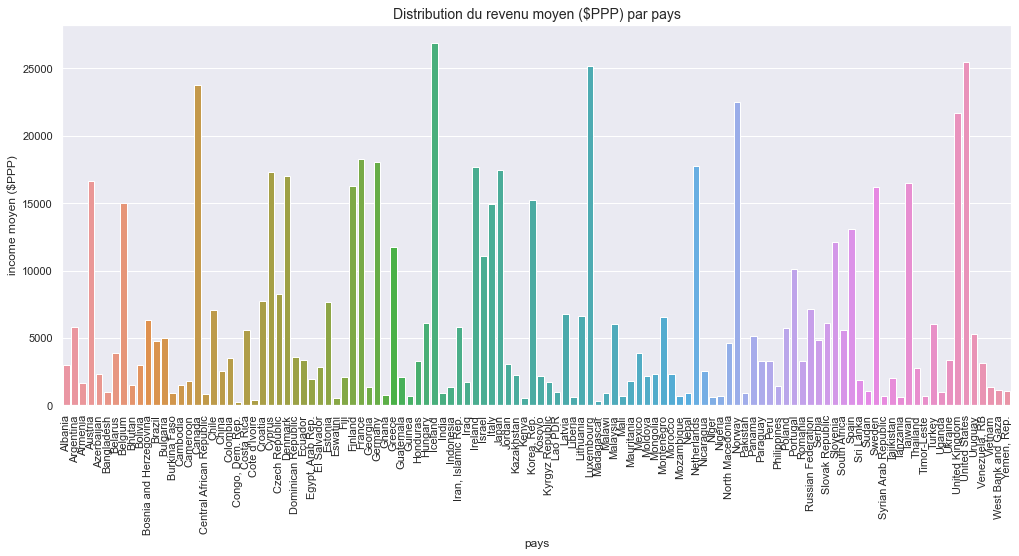

In [21]:
fig = plt.figure(figsize=(17,7))
ax = sns.barplot(x='country', y='mean_income', data = groups)
plt.xticks(rotation=90)
plt.title('Distribution du revenu moyen ($PPP) par pays', size=14)
plt.xlabel('pays', size=12)
plt.ylabel('income moyen ($PPP)', size = 12)
plt.savefig('Distribution du revenu moyen ($PPP) par pays.jpg')
# plt.show()

Remarque : il semble que le pays influe sur le revenu moyen

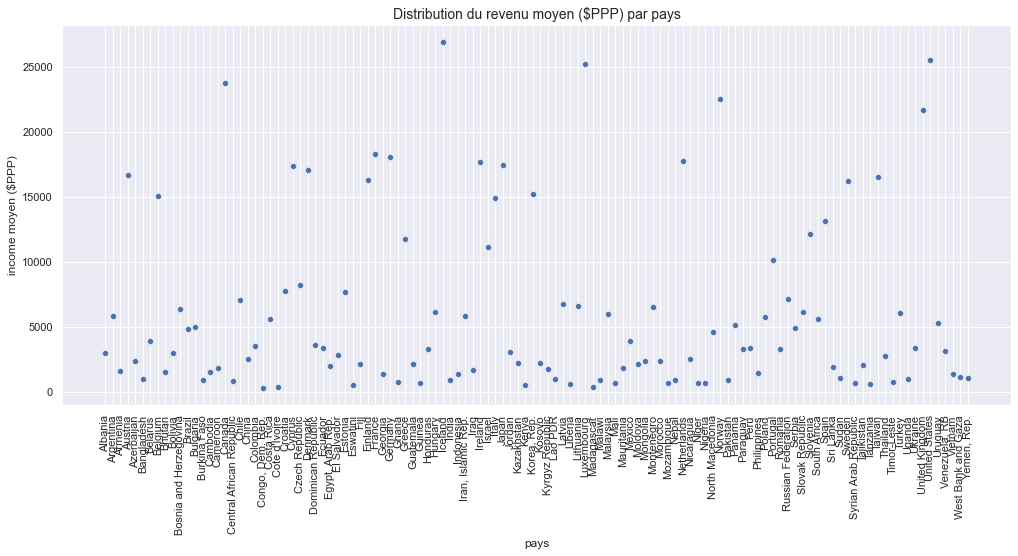

In [22]:
fig = plt.figure(figsize=(17,7))
ax = sns.scatterplot(x='country', y='mean_income', data = groups)
plt.xticks(rotation=90)
plt.title('Distribution du revenu moyen ($PPP) par pays', size=14)
plt.xlabel('pays', size=12)
plt.ylabel('income moyen ($PPP)', size = 12)
plt.savefig('Distribution du revenu moyen ($PPP) par pays.jpg')
# plt.show()

Remarque : selon le pays, le revenu moyen est changeant

#### Compte tenu du temps d'exécution de l'ANOVA, nous allons réduire la taille du dataset
- En choisissant les pays précédemment sélectionnés : 'China', 'France', 'Russian Federation', 'Spain', 'Turkey', 'United States'

In [23]:
pays_choisis = ['China', 'France', 'Russian Federation', 'Spain', 'Turkey', 'United States']

In [24]:
df_anov_pays_choisis = df_Gj_inc_pj_mj_cip_ln[df_Gj_inc_pj_mj_cip_ln['country'].isin(pays_choisis)]

In [25]:
df_anov_pays_choisis['country'].unique()

['China', 'France', 'Russian Federation', 'Spain', 'Turkey', 'United States']
Categories (6, object): ['China', 'France', 'Russian Federation', 'Spain', 'Turkey', 'United States']

In [26]:
df_anov_pays_choisis.shape

(300000, 9)

In [27]:
df_anov_pays_choisis.describe()

,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,12109.996147,0.413756,50.500000,12109.996147,38.383333,8.851602,9.143370
std,14816.148408,0.050958,28.866118,7874.045915,3.801943,1.139784,0.769221
min,16.719418,0.349861,1.000000,2522.758726,32.200000,2.816571,7.833108
25%,3496.510150,0.363191,25.750000,6050.465331,34.400000,8.159519,8.707890
50%,7932.643000,0.412201,50.500000,10136.881809,40.000000,8.978735,9.178739
75%,15612.348750,0.465537,75.250000,18309.407545,40.700000,9.655817,9.815170
max,176928.550000,0.483319,100.000000,25503.581661,43.000000,12.083501,10.146574


#### Visualisation de la normalité (ou non) des données <a class="anchor" id="vis_donnees"></a>

- Par QQ plot

In [28]:
df_anov_pays_choisis.head(1)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj
950000,China,CHN,16.719418,0.483319,1.0,2522.758726,43.0,2.816571,7.833108


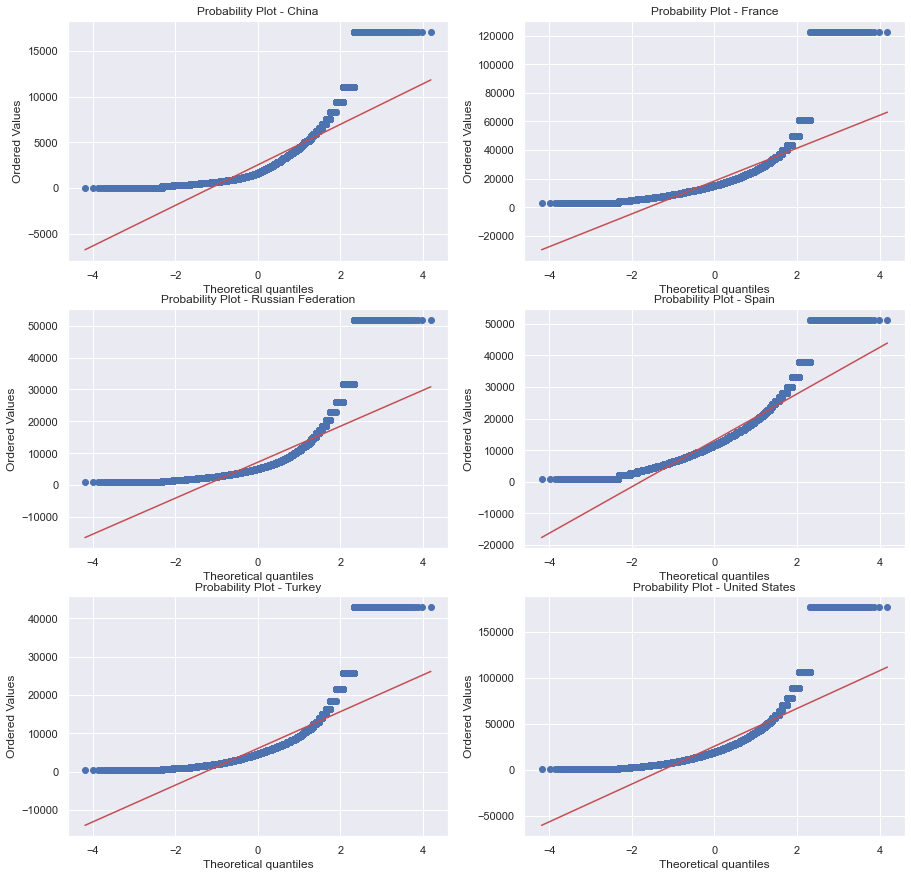

In [29]:
# unique_income = df_anov_pays_choisis['income'].unique()
pays_choisis = ['China', 'France', 'Russian Federation', 'Spain', 'Turkey', 'United States']

a = 3  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))
for pays in pays_choisis :
    
    plt.subplot(a, b, c)
    st.probplot(df_anov_pays_choisis[df_anov_pays_choisis['country'] == pays]['income'], dist="norm", plot=plt)    
    plt.title("Probability Plot - " +  pays)
    c += 1
plt.show()    


Remarque : la variable "income" n'apparaît pas être une variable gaussienne

Avec le logarithme de l'income

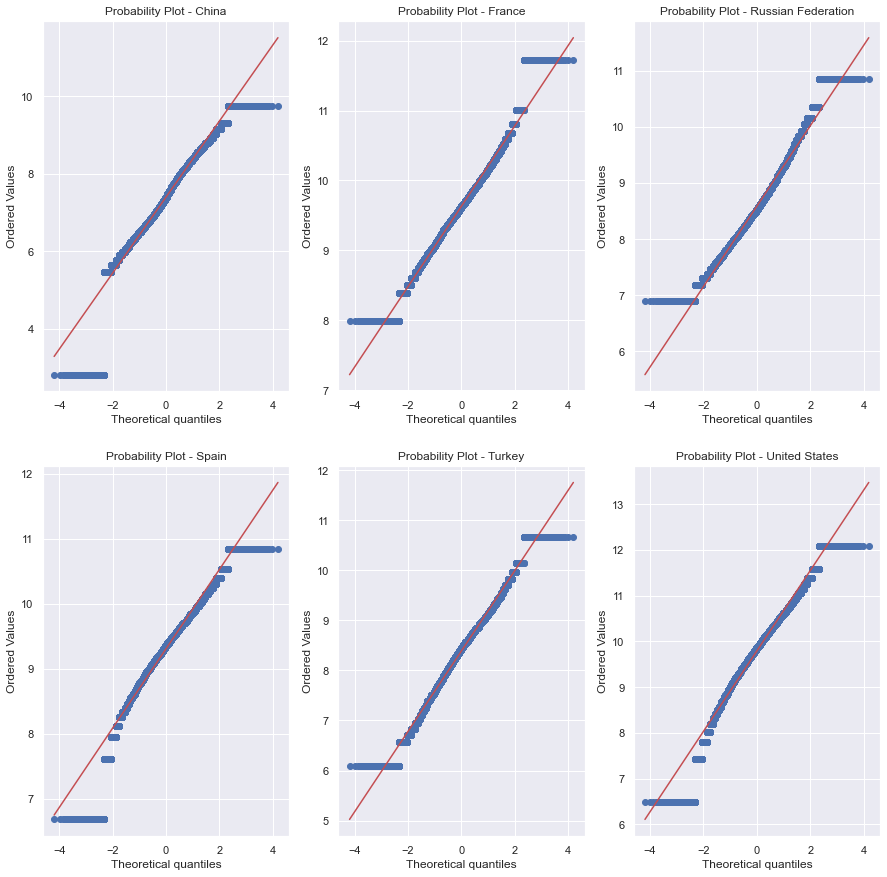

In [30]:
pays_choisis = ['China', 'France', 'Russian Federation', 'Spain', 'Turkey', 'United States']

a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,15))
for pays in pays_choisis :
    
    plt.subplot(a, b, c)
    st.probplot(df_anov_pays_choisis[df_anov_pays_choisis['country'] == pays]['ln_income'], dist="norm", plot=plt)    
    plt.title("Probability Plot - " +  pays)
    c += 1
plt.show()   

Remarque : les données sont plus proches de la normale en logarithme

Vérification de l'homogénéité de la variance par un calcul de ratio (max var / min var)

In [31]:
# calcul du ratio ecart type max/ écart type min sur l'income  income_ln
df_anov_pays_choisis_ratio_inc = df_anov_pays_choisis[['country', 'income']]
ratio = df_anov_pays_choisis_ratio_inc.groupby('country').std().max() / df_anov_pays_choisis_ratio_inc.groupby('country').std().min()
print(f'le ratio avec income est : {ratio}')

le ratio avec income est : income    9.423434
dtype: float64


In [32]:
# calcul du ratio ecart type max/ écart type min sur l'income_ln
df_anov_pays_choisis_ratio_ln_inc = df_anov_pays_choisis[['country', 'ln_income']]
ratio = df_anov_pays_choisis_ratio_ln_inc.groupby('country').std().max() / df_anov_pays_choisis_ratio_ln_inc.groupby('country').std().min()
print(f'le ratio avec ln_income est : {ratio}')

le ratio avec ln_income est : ln_income    1.7339
dtype: float64


Remarque : 
- ratio < 2 pour ln_income donc normalité
- homogénéité des variances pour la variable en log

### Anova "manuelle" : <a class="anchor" id="anova_manuelle"></a>
ressource : (https://towardsdatascience.com/anova-test-with-python-cfbf4013328b)
 - SCT : SSTO
 - SCE : SSTR
 - SCR : SSE
- SSTO = SSTR + SSE
- les échantillons sont pris aléatoirement et sont indépendants entre eux
- les valeurs de chaque échantillon doivent suivre une loi normale
- les variances des échantillons doivent être égales. Si le ratio (var +gde) / (var +ptite)< 2, alors on considèrera les variances égales

Tests d'hypothèse : 
- H0 : les moyennes sont égales
- H1 : les moyennes sont différentes
- seuil alpha : 0.05

In [33]:
df_anov_pays_choisis.head(1)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj
950000,China,CHN,16.719418,0.483319,1.0,2522.758726,43.0,2.816571,7.833108


In [34]:
# Création d'une table qui récupérera les valeurs calculées
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

In [35]:
# Avec "income"
# calcul de SSTR et incorporation des valeurs dans anova_table
income_bar = df_anov_pays_choisis['income'].mean()
SSTR = df_anov_pays_choisis.groupby('country').count() * (df_anov_pays_choisis.groupby('country').mean() - income_bar)**2
anova_table['SS']['Between Groups'] = SSTR['income'].sum()

In [36]:
# calcul de SSE et incorporation des valeurs dans anova_table
SSE = (df_anov_pays_choisis.groupby('country').count() - 1) * df_anov_pays_choisis.groupby('country').std()**2
anova_table['SS']['Within Groups'] = SSE['income'].sum()

In [37]:
# calcul de SSTR and incorporation des valeurs dans anova_table
SSTR = SSTR['income'].sum() + SSE['income'].sum()
anova_table['SS']['Total'] = SSTR

In [38]:
# calcul des degres de liberté
anova_table['df']['Between Groups'] = df_anov_pays_choisis['country'].nunique() - 1
anova_table['df']['Within Groups'] = df_anov_pays_choisis.shape[0] - df_anov_pays_choisis['country'].nunique()
anova_table['df']['Total'] = df_anov_pays_choisis.shape[0] - 1

In [39]:
# calcul de MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

In [40]:
# calcul de F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

In [41]:
# p-value
anova_table['P-value']['Between Groups'] = 1 - st.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

In [42]:
# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = st.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

In [43]:
# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,1.86001e+13,5,3.72002e+12,23616.2,1.11022e-16,2.56654
Within Groups,4.72551e+13,299994,1.5752e+08,,,
Total,6.58553e+13,299999,2.19518e+08,,,


In [44]:
# The p-value approach
print("Approach 1: La p-value approche l'hypothèse testée au seuil choisi")
conclusion = "L\'hypothèse null ne peut pas être rejetée au seuil alpha"
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "L\'hypothèse null peut être rejetée au seuil alpha"
print("F-score est:", anova_table['F']['Between Groups'], " et p value est:", anova_table['P-value']['Between Groups'])    
print(conclusion)

Approach 1: La p-value approche l'hypothèse testée au seuil choisi
F-score est: 23616.156253229536  et p value est: 1.1102230246251565e-16
L'hypothèse null peut être rejetée au seuil alpha


In [45]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: La valeur critique approche de l'hypothèse au seuil choisi")
conclusion = "L\'hypothèse null ne peut pas être rejetée au seuil alpha"
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "L\'hypothèse null est rejetée"
print("F-score est:", anova_table['F']['Between Groups'], "et la valeur critique est:", anova_table['F crit']['Between Groups'])
print(conclusion)


--------------------------------------------------------------------------------------
Approach 2: La valeur critique approche de l'hypothèse au seuil choisi
F-score est: 23616.156253229536 et la valeur critique est: 2.5665424585736716
L'hypothèse null est rejetée


#### Nouvel échantillonnage en prenant TOUS les pays mais seulement quelques individus pour chaque pays (500 * 100 individus par pays pour le dataset initial => traitement trop long....)
- on prend 5000 individus par pays soit 10 fois moins que le dataset initial
- ainsi, l'échantillon analysé sera plus proche de la réalité car comprend l'ensemble des différences entre les pays

In [46]:
df_Gj_inc_pj_mj_cip_ln.head(1)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj
0,Albania,ALB,728.89795,0.535604,1.0,2994.829902,30.0,6.591534,8.004643


In [47]:
nb_individus = 5000

In [48]:
# échantillonnage en prenant 5000 individus par pays 
# random.seed(30)
df_sample_pays_ind = df_Gj_inc_pj_mj_cip_ln.groupby('country').sample(n=nb_individus, random_state = 42).reset_index(drop=True)

# sample_df_pays2 = df_Gj_inc_pj_mj_cip_ln[df_Gj_inc_pj_mj_cip_ln['c_i_parent'].isin(sample_individus)].reset_index(drop=True)

In [49]:
# nouveau dataset pour l'analyse
df_sample_pays_ind.head(5)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj
0,Albania,ALB,3146.22920,0.535604,19.0,2994.829902,30.0,8.053960,8.004643
1,Albania,ALB,1636.65930,0.535604,68.0,2994.829902,30.0,7.400412,8.004643
2,Albania,ALB,728.89795,0.535604,6.0,2994.829902,30.0,6.591534,8.004643
3,Albania,ALB,1821.85380,0.535604,80.0,2994.829902,30.0,7.507610,8.004643
4,Albania,ALB,3747.26760,0.535604,99.0,2994.829902,30.0,8.228782,8.004643


In [50]:
print('dataset_initial :{} VS dataset_regression {}'.format(df_Gj_inc_pj_mj_cip_ln.shape, df_sample_pays_ind.shape))

dataset_initial :(5800000, 9) VS dataset_regression (580000, 9)


#### Test ANOVA  sans log<a class="anchor" id="test_anova"></a>

Visualisation

In [51]:
df_box = df_sample_pays_ind[['country', 'income']]
income_ord = df_box.sort_values('income', ascending=True)
ord_income = income_ord.groupby('country')['income'].median().sort_values().index

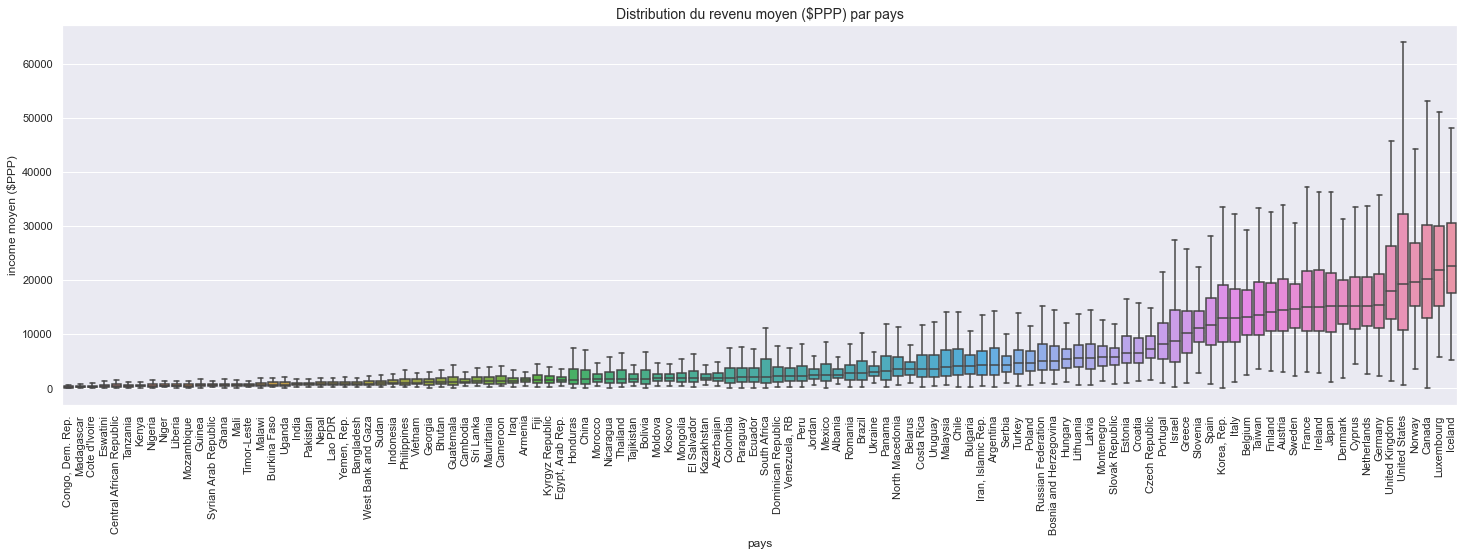

In [52]:
fig = plt.figure(figsize=(25,7))
sns.boxplot(x= 'country', y= 'income', data=income_ord, showfliers=False, order=ord_income)
plt.xticks(rotation=90)
plt.title('Distribution du revenu moyen ($PPP) par pays', size=14)
plt.xlabel('pays', size=12)
plt.ylabel('income moyen ($PPP)', size = 12)
plt.savefig("Distribution du revenu moyen ($PPP) par pays.jpg")
# plt.show()

Remarque : il semble qu'il y ait une relation nette entre les pays et l'income

Test ANOVA   
Tests d'hypothèse : 
- H0 : les moyennes sont égales
- H1 : les moyennes sont différentes
- seuil alpha : 0.05

In [53]:
# ANOVA Test  https://ichi.pro/fr/anova-explique-avec-un-exemple-81967682531701
model = ols('income ~ country', data=df_sample_pays_ind).fit()
anova = sm.stats.anova_lm(model, typ=2)

anova

,sum_sq,df,F,PR(>F)
country,2.556473e+13,115.0,4990.642917,0.0
Residual,2.583021e+13,579884.0,NaN,NaN


In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     4991.
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:11:50   Log-Likelihood:            -5.9304e+06
No. Observations:              580000   AIC:                         1.186e+07
Df Residuals:                  579884   BIC:                         1.186e+07
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            2978.5934     94.386     31.558      0.000    2793.599    3163.587
country[T.Argentina]                 2892.4913    133.482     21.669      0.000    2630.870    3154.112
country[T.Armenia]                  -1341.5480    133.482    -10.050      0.000   -1603.169   -1079.927
country[T.Austria]                   1.358e+04    133.482    101.752      0.000    1.33e+04    1.38e+04
country[T.Azerbaijan]                -618.0155    133.482     -4.630      0.000    -879.636    -356.395
country[T.Bangladesh]               -1976.5184    133.482    -14.807      0.000   -2238.139   -1714.898
country[T.Belarus]                    924.8334    133.482      6.929      0.000     663.213    1186.454
country[T.Belgium]                   1.222e+04    133.482     91.560      0.000     1.2e+04    1.25e+04
country[T.Bhutan]                   -1457.1673    133.482    -10.917      0.000   -1718.788   -1195.546
country[T.Bolivia]                     35.2931    133.482      0.264      0.791    -226.328     296.914
country[T.Bosnia and Herzegovina]    3299.1655    133.482     24.716      0.000    3037.545    3560.786
country[T.Brazil]                    1682.7875    133.482     12.607      0.000    1421.167    1944.408
country[T.Bulgaria]                  2071.1086    133.482     15.516      0.000    1809.488    2332.730
country[T.Burkina Faso]             -2062.1691    133.482    -15.449      0.000   -2323.790   -1800.548
country[T.Cambodia]                 -1506.9615    133.482    -11.290      0.000   -1768.582   -1245.341
country[T.Cameroon]                 -1146.5915    133.482     -8.590      0.000   -1408.212    -884.971
country[T.Canada]                    2.077e+04    133.482    155.607      0.000    2.05e+04     2.1e+04
country[T.Central African Republic] -2164.9343    133.482    -16.219      0.000   -2426.555   -1903.313
country[T.Chile]                     4029.0724    133.482     30.184      0.000    3767.451    4290.693
country[T.China]                     -449.2227    133.482     -3.365      0.001    -710.844    -187.602
country[T.Colombia]                   636.1060    133.482      4.765      0.000     374.485     897.727
country[T.Congo, Dem. Rep.]         -2700.8322    133.482    -20.234      0.000   -2962.453   -2439.211
country[T.Costa Rica]                2566.5032    133.482     19.227      0.000    2304.882    2828.124
country[T.Cote d'Ivoire]            -2581.1634    133.482    -19.337      0.000   -2842.784   -2319.543
country[T.Croatia]                   4708.8227    133.482     35.277      0.000    4447.202    4970.444
country[T.Cyprus]                    1.432e+04    133.482    107.312      0.000    1.41e+04    1.46e+04
country[T.Czech Republic]            5224.7613    133.482     39.14

La p_value est inférieure au seuil de 0.05 fixé. HO peut être rejetée à ce seuil. Les moyennes des incomes sont différentes selon le pays.

Remarque : nous avons qu'il y a une différence de moyenne mais nous ne savons pas où ...  
Il faudra faire des tests d'hypothèses entre 2 pays à la fois

#### Calcul éta_carré pour effet taille de country (mais estimateur biaisé => lui préférer l'omega_squared)

In [55]:
# eta carre http://www.pybloggers.com/2016/02/four-ways-to-conduct-one-way-anovas-with-python/
#  https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/
esq_sm = anova['sum_sq'][0]/(anova['sum_sq'][0]+anova['sum_sq'][1])
anova['EtaSq'] = [esq_sm, 'NaN']
print(anova)

                sum_sq        df            F  PR(>F)     EtaSq
country   2.556473e+13     115.0  4990.642917     0.0  0.497417
Residual  2.583021e+13  579884.0          NaN     NaN       NaN


In [56]:
eta_carre = anova['EtaSq']
print(f'eta carré : {eta_carre}' )

eta carré : country     0.497417
Residual         NaN
Name: EtaSq, dtype: object


Remarque : la variable 'country' explique 49.74% de la variance du modèle

In [57]:
# import pingouin as pg
# donne eta_carre (np2)b
# aov = pg.anova(data=df_sample_pays_ind, dv='income', between='country', detailed=True)
# print(aov)

#### Tukey HSD test (Honestly Significant Difference) <a class="anchor" id="tuckey"></a>

In [58]:
# test de Tuckey pour voir où se situent les échantillons qui diffèrent significativement des autres
# Si test de Fischer rejette H0 => quels échantillons se distinguent des autres
mc = statsmodels.stats.multicomp.MultiComparison(df_sample_pays_ind['income'],df_sample_pays_ind['country'])
mc_results = mc.tukeyhsd()
print(mc_results)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                        
         group1                   group2            meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------------------------------------
                 Albania                Argentina   2892.4913  0.001   2309.4988   3475.4839   True
                 Albania                  Armenia   -1341.548  0.001  -1924.5406   -758.5555   True
                 Albania                  Austria  13582.0464  0.001  12999.0539  14165.0389   True
                 Albania               Azerbaijan   -618.0155 0.0172  -1201.0081     -35.023   True
                 Albania               Bangladesh  -1976.5184  0.001   -2559.511  -1393.5259   True
                 Albania                  Belarus    924.8334  0.001    341.8409    1507.826   True
                 Albania                  Belgium  12221.6783  0.001  11638.6857  12804.6708   True


Remarque : les pays ont des income différents

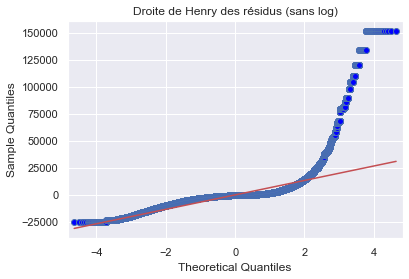

In [59]:
res = model.resid
fig = sm.qqplot(res, line='s')
plt.title("Droite de Henry des résidus (sans log)")
plt.savefig("qqplot_anova_sanslog.jpg")
# plt.show()

Remarque : la courbe de Henry des résidus ne suit pas vraiment une loi gaussienne

#### Anova avec ln_income <a class="anchor" id="anova_ln_income"></a>

In [60]:
# ANOVA Test  https://ichi.pro/fr/anova-explique-avec-un-exemple-81967682531701
ln_model = ols('ln_income ~ country', data=df_sample_pays_ind).fit()
ln_anova = sm.stats.anova_lm(ln_model, typ=2)

ln_anova

,sum_sq,df,F,PR(>F)
country,807957.337757,115.0,13604.662511,0.0
Residual,299463.531877,579884.0,NaN,NaN


In [61]:
ln_model.rsquared

0.7295847133753596

In [62]:
ln_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_income   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 1.360e+04
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:12:38   Log-Likelihood:            -6.3128e+05
No. Observations:              580000   AIC:                         1.263e+06
Df Residuals:                  579884   BIC:                         1.264e+06
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               7.8530      0.010    772.718      0.000       7.833       7.873
country[T.Argentina]                    0.4577      0.014     31.848      0.000       0.430       0.486
country[T.Armenia]                     -0.5637      0.014    -39.221      0.000      -0.592      -0.536
country[T.Austria]                      1.7316      0.014    120.477      0.000       1.703       1.760
country[T.Azerbaijan]                  -0.2520      0.014    -17.531      0.000      -0.280      -0.224
country[T.Bangladesh]                  -1.1071      0.014    -77.026      0.000      -1.135      -1.079
country[T.Belarus]                      0.3032      0.014     21.094      0.000       0.275       0.331
country[T.Belgium]                      1.6345      0.014    113.727      0.000       1.606       1.663
country[T.Bhutan]                      -0.7656      0.014    -53.265      0.000      -0.794      -0.737
country[T.Bolivia]                     -0.4939      0.014    -34.366      0.000      -0.522      -0.466
country[T.Bosnia and Herzegovina]       0.6789      0.014     47.234      0.000       0.651       0.707
country[T.Brazil]                       0.0681      0.014      4.740      0.000       0.040       0.096
country[T.Bulgaria]                     0.4257      0.014     29.617      0.000       0.397       0.454
country[T.Burkina Faso]                -1.2958      0.014    -90.161      0.000      -1.324      -1.268
country[T.Cambodia]                    -0.7119      0.014    -49.533      0.000      -0.740      -0.684
country[T.Cameroon]                    -0.5934      0.014    -41.289      0.000      -0.622      -0.565
country[T.Canada]                       1.9662      0.014    136.802      0.000       1.938       1.994
country[T.Central African Republic]    -1.7394      0.014   -121.023      0.000      -1.768      -1.711
country[T.Chile]                        0.5041      0.014     35.074      0.000       0.476       0.532
country[T.China]                       -0.4574      0.014    -31.825      0.000      -0.486      -0.429
country[T.Colombia]                    -0.2920      0.014    -20.313      0.000      -0.320      -0.264
country[T.Congo, Dem. Rep.]            -2.5651      0.014   -178.470      0.000      -2.593      -2.537
country[T.Costa Rica]                   0.3504      0.014     24.379      0.000       0.322       0.379
country[T.Cote d'Ivoire]               -2.1581      0.014   -150.155      0.000      -2.186      -2.130
country[T.Croatia]                      0.9482      0.014     65.975      0.000       0.920       0.976
country[T.Cyprus]                       1.7775      0.014    123.674      0.000       1.749       1.806
country[T.Czech Republic]               1.0472      0.014     72.85

- Prob (F-statistic): 0 => au seuil de 5%, le modèle est globalement significatif
- Prob(JB)= 0 => au seuil de 5%, on peut rejeter l'hypothèse null de normalité des résidus
- AIC et BIC diminuent

In [63]:
# eta carre
ln_esq_sm = ln_anova['sum_sq'][0]/(ln_anova['sum_sq'][0]+ln_anova['sum_sq'][1])
ln_anova['EtaSq'] = [ln_esq_sm, 'NaN']
print(ln_anova)

                 sum_sq        df             F  PR(>F)     EtaSq
country   807957.337757     115.0  13604.662511     0.0  0.729585
Residual  299463.531877  579884.0           NaN     NaN       NaN


Remarque : 
- eta_carré est de 0.73 au lieu de 0.50 sans les logs
- la variable "country" explique 0.73% de la variance du modèle log

In [64]:
# test de Tuckey pour voir où se situent les différences
ln_mc = statsmodels.stats.multicomp.MultiComparison(df_sample_pays_ind['ln_income'],df_sample_pays_ind['country'])
ln_mc_results = ln_mc.tukeyhsd()
print(ln_mc_results)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
                 Albania                Argentina   0.4577  0.001   0.395  0.5205   True
                 Albania                  Armenia  -0.5637  0.001 -0.6265 -0.5009   True
                 Albania                  Austria   1.7316  0.001  1.6688  1.7943   True
                 Albania               Azerbaijan   -0.252  0.001 -0.3147 -0.1892   True
                 Albania               Bangladesh  -1.1071  0.001 -1.1698 -1.0443   True
                 Albania                  Belarus   0.3032  0.001  0.2404   0.366   True
                 Albania                  Belgium   1.6345  0.001  1.5718  1.6973   True
                 Albania                   Bhutan  -0.7656  0.001 -0.8283 -0.7028   True
                 Alba

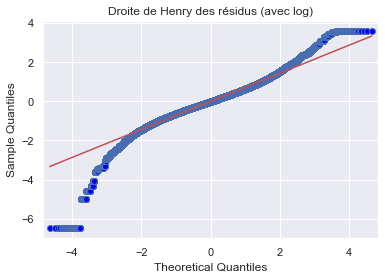

In [65]:
ln_res = ln_model.resid
fig = sm.qqplot(ln_res, line='s')
plt.title("Droite de Henry des résidus (avec log)")
plt.savefig("qqplot_anova_aveclog.jpg")
# plt.show()

Remarque : les résidus semblent mieux suivre une distribution normale


### Pour chacune des régressions suivantes, vous testerez 2 versions : 
> - l'une en exprimant le revenu moyen du pays et les revenus (parents & enfants) en logarithme (ln) 
> - l'autre en les laissant tels quels 
> - Vous choisirez la version la plus performante pour répondre aux questions
<a class="anchor" id="reg"></a>

Ressources :  
- [régression multiple sous python](https://www.youtube.com/watch?v=VRazQ101XyU&list=PLi0b6yHwHZcEw_2p__mpfKFn48_Oj3Cdv&index=8)
- [Testez le modèle linéaire gaussien multiple](https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754142-testez-le-modele-lineaire-gaussien-multiple)

#### Sans log : 
- Appliquez une régression linéaire sur vos données, en n’incluant comme variables explicatives uniquement le revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu
<a class="anchor" id="sans_log_gj"></a>

In [66]:
df_sample_pays_ind.head(1)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj
0,Albania,ALB,3146.2292,0.535604,19.0,2994.829902,30.0,8.05396,8.004643


In [67]:
# variable cible : income
# variables explicatives : mj et Gj
# instantation de l'objet régression
reg_mj_gj = smf.ols("income ~ mj+Gj", data = df_sample_pays_ind)
# estimation des paramètres
res_mj_gj = reg_mj_gj.fit()

In [68]:
res_mj_gj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 2.869e+05
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:13:04   Log-Likelihood:            -5.9304e+06
No. Observations:              580000   AIC:                         1.186e+07
Df Residuals:                  579997   BIC:                         1.186e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4386     48.388      1.104      0.269     -41.401     148.278
mj             1.0004      0.001    710.000      0.000       0.998       1.003
Gj            -1.3818      1.166     -1.185      0.236      -3.668       0.904
==============================================================================
Omnibus:                   730698.302   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        212466196.805
Skew:                           6.749   Prob(JB):                         0.00
Kurtosis:                      95.787   Cond. No.                     4.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
res_mj_gj.rsquared

0.49734897475935425

Remarque : 
- résidus : au seuil de 5%, l'hypothèse null de normalité des résidus peut être rejetée (Prob(JB):0)
- R² : 0.497
- Prob (F-statistic): 0 :la p_value est inférieure au seuil alpha de 0.05. Le modèle est globalement significatif.  
- variable pertinente au seuil de 5% : mj	

In [70]:
res_mj_gj_anova= sm.stats.anova_lm(res_mj_gj, typ=1)
res_mj_gj_anova

,df,sum_sq,mean_sq,F,PR(>F)
mj,1.0,2.556116e+13,2.556116e+13,573877.687185,0.000000
Gj,1.0,6.251495e+07,6.251495e+07,1.403533,0.236133
Residual,579997.0,2.583372e+13,4.454113e+07,NaN,NaN


R² = SCT / SCE

In [71]:
# Calcul du R2 pour la variable 'mj'
r2_mj = res_mj_gj_anova.sum_sq['mj'] / res_mj_gj_anova['sum_sq'].sum()
print('la variable mj explique {} % du modèle' .format(round(r2_mj*100,2)))

la variable mj explique 49.73 % du modèle


In [72]:
# Calcul du R2 pour la variable 'Gj'
r2_Gj = res_mj_gj_anova.sum_sq['Gj'] / res_mj_gj_anova['sum_sq'].sum()
print('la variable Gj explique {} % du modèle' .format(round(r2_Gj*100,2)))

la variable Gj explique 0.0 % du modèle


In [73]:
#  vérification
r2_mj + r2_Gj, res_mj_gj.rsquared

(0.4973489747593891, 0.49734897475935425)

Remarque : la variable mj explique à elle seule le modèle

Droite de Henry : QQplot (sans log)

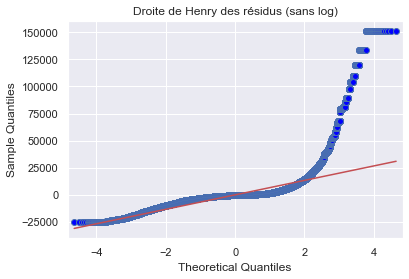

In [74]:
# sm.qqplot(res_mj_gj.resid)
mj_gj_res = res_mj_gj.resid
fig = sm.qqplot(mj_gj_res, line='s')
plt.title("Droite de Henry des résidus (sans log)")
plt.savefig("qqplot_reg_mj_gj_sanslog.jpg")
plt.show()

### Test de la normalité des résidus (sans log) 
<a class="anchor" id="sans_log_norm_res"></a>

Test de Kolmogorov-Smirnov pour test d'adéquation à une loi normale (nombre d'observations élévé)

In [75]:
residu = res_mj_gj.resid
ks_2samp_test(residu)

p_value :1.0122079816700041e-51


'HO rejetée au seuil alpha, la variable résidu ne suit pas une loi normale'

Remarque : on n'est pas dans une hypothèse de normalité des résidus. La régression linéaire dans ce cas ne serait pas le modèle adapté. Mais compte tenu du nombre d'observations (>30), on peut considérer qu'on est dans le cadre du TLC. Les résultats de cette régression peuvent être pris en compte.

Graphique des résidus (sans log)

In [76]:
# Return the difference between observed and fitted values
df_sample_pays_ind['residu_s'] = res_mj_gj.resid

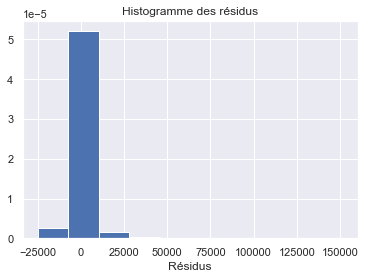

In [77]:
plt.hist(df_sample_pays_ind['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

<Figure size 360x360 with 0 Axes>

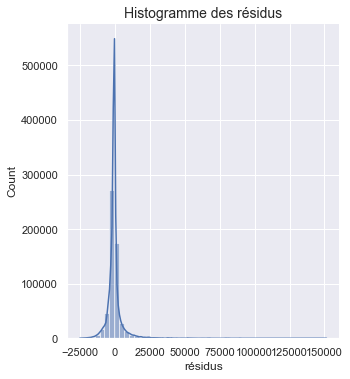

In [78]:
# visualisation des résidus
fig = plt.figure(figsize=(5,5))
sns.displot(x = res_mj_gj.resid,  kde=True,  bins=50, kind='hist')
plt.xlabel('résidus', size=12)
plt.title("Histogramme des résidus", size=14)
plt.show()

Remarque : l'histogramme montre bien un centrage autour de 0 et une symétrie

<AxesSubplot:xlabel='income'>

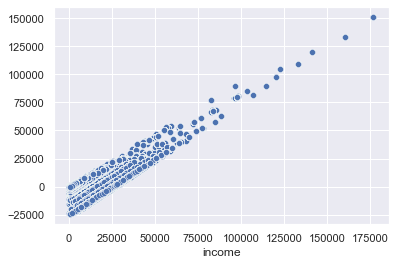

In [79]:
# ordonnée : le résidu
# abscisse : variable endogène (v.expliquée)
sns.scatterplot(x='income', y=mj_gj_res, data=df_sample_pays_ind)

Remarque : les points ne sont pas dissiminés de façon aléatoire (valeur income faible, on a y-^y<0 => sous estimation,valeur income forte, on a y-^y>0 => sur estimation)

In [80]:
# exogene VS residu
# voir les points bizarres
# for j in range(1, 3):
#     plt.scatter(df_sample_pays_ind.iloc[:,j],mj_gj_res )
#     plt.show()

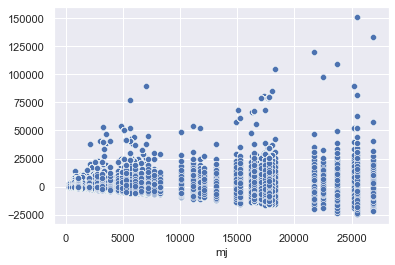

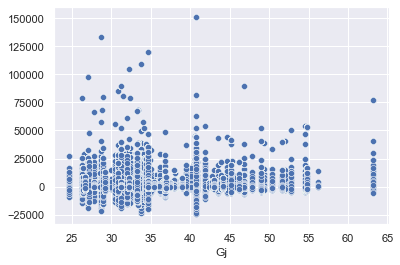

In [81]:
# exogene (v.explicative) VS residu
# voir les points bizarres
variable = ['mj', 'Gj']
for var in variable:
    sns.scatterplot(x = var, y = mj_gj_res , data=df_sample_pays_ind)
    plt.show()

Remarque : présence de points atypiques sur les 2 variables

#### Points atypiques  (sans log) <a class="anchor" id="sans_log_pts_atyp"></a>

In [82]:
# levier .summary_frame().reset_index()
influence = res_mj_gj.get_influence()
influence

In [83]:
# influence = reg_multi.get_influence().summary_frame().reset_index()

In [84]:
# nombre d'observations
n = df_sample_pays_ind.shape[0]
#  nombre de variables exogènes (explicatives)
# p = df_sample_pays_ind.shape[1]-1 
p = 3

In [85]:
# atypisme en fonction du levier
levier = influence.hat_matrix_diag
print("valeurs leviers \n", levier)

valeurs leviers 
 [4.54679662e-06 4.54679662e-06 4.54679662e-06 ... 2.73302314e-06
 2.73302314e-06 2.73302314e-06]


In [86]:
# seuil
seuil_levier = 2*(p+1)/n
print("seuil pour levier : ", seuil_levier)

seuil pour levier :  1.3793103448275862e-05


In [87]:
#  atypiques
atypique_levier = levier > seuil_levier
print('pays atypiques leviers', df_sample_pays_ind.country[atypique_levier])

pays atypiques leviers 80000            Canada
80001            Canada
80002            Canada
80003            Canada
80004            Canada
              ...      
554995    United States
554996    United States
554997    United States
554998    United States
554999    United States
Name: country, Length: 25000, dtype: category
Categories (116, object): ['Albania', 'Argentina', 'Armenia', 'Austria', ..., 'Venezuela, RB', 'Vietnam', 'West Bank and Gaza', 'Yemen, Rep.']


### Avec log : 
- Appliquez une régression linéaire sur vos données, en n’incluant comme variables explicatives uniquement le log du revenu moyen du pays de l’individu et l’indice de Gini du pays de l’individu <a class="anchor" id="log_mj_gj"></a>

In [88]:
df_sample_pays_ind.head(1)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj,residu_s
0,Albania,ALB,3146.2292,0.535604,19.0,2994.829902,30.0,8.05396,8.004643,138.259626


In [89]:
# variable cible : ln_income
# variables explicatives : ln_mj et Gj
# instantation de l'objet régression
ln_reg_mj_gj = smf.ols("ln_income ~ ln_mj+Gj", data = df_sample_pays_ind)
# estimation des paramètres
ln_res_mj_gj = ln_reg_mj_gj.fit()

In [90]:
ln_res_mj_gj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_income   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 7.773e+05
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:13:45   Log-Likelihood:            -6.3268e+05
No. Observations:              580000   AIC:                         1.265e+06
Df Residuals:                  579997   BIC:                         1.265e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4953      0.009     52.963      0.000       0.477       0.514
ln_mj          0.9881      0.001   1154.725      0.000       0.986       0.990
Gj            -0.0177      0.000   -144.194      0.000      -0.018      -0.017
==============================================================================
Omnibus:                    37762.545   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           176361.518
Skew:                          -0.104   Prob(JB):                         0.00
Kurtosis:                       5.693   Cond. No.                         390.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
print('la variance de ln_income est expliquée à {}% par le modèle'.format(round(ln_res_mj_gj.rsquared * 100,2)))

la variance de ln_income est expliquée à 72.83% par le modèle


Remarque : 
- résidus : au seuil de 5%, l'hypothèse null de normalité des résidus peut être rejetée (Prob(JB):0)
- R² : 0.728
- Prob (F-statistic): 0 :la p_value est inférieure au seuil alpha de 0.05. Le modèle est globalement significatif. 
- variable pertinente au seuil de 5% : ln_mj et Gj

In [92]:
ln_res_mj_gj_anova= sm.stats.anova_lm(ln_res_mj_gj, typ=1)
ln_res_mj_gj_anova

,df,sum_sq,mean_sq,F,PR(>F)
ln_mj,1.0,795723.619705,795723.619705,1.533738e+06,0.0
Gj,1.0,10787.187015,10787.187015,2.079205e+04,0.0
Residual,579997.0,300910.062916,0.518813,NaN,NaN


In [93]:
# Calcul du R2 pour la variable 'ln_mj'
r2_ln_mj = ln_res_mj_gj_anova.sum_sq['ln_mj'] / ln_res_mj_gj_anova['sum_sq'].sum()
print('la variable ln_mj explique {} % de la variance ln_income' .format(round(r2_mj*100,2)))

la variable ln_mj explique 49.73 % de la variance ln_income


In [94]:
# Calcul du R2 pour la variable 'Gj'
r2_Gj = ln_res_mj_gj_anova.sum_sq['Gj'] / ln_res_mj_gj_anova['sum_sq'].sum()
print('la variable Gj explique {} % de la variance ln_income' .format(round(r2_Gj*100,2)))

la variable Gj explique 0.97 % de la variance ln_income


In [95]:
# Vérification
r2_Gj + r2_ln_mj, ln_res_mj_gj.rsquared

(0.7282784972121469, 0.7282784972121454)

#### Normalité des résidus <a class="anchor" id="log_norm_res"></a>

Droite de Henry : QQplot (log)

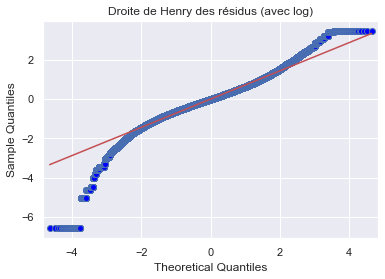

In [96]:
# sm.qqplot(res_mj_gj.resid)
ln_mj_gj_res = ln_res_mj_gj.resid
fig = sm.qqplot(ln_mj_gj_res, line='s')
plt.title("Droite de Henry des résidus (avec log)")
plt.savefig("qqplot_reg_mj_gj_aveclog.jpg")
# plt.show()

Remarque : on n'est pas dans une hypothèse de normalité des données. La régression linéaire dans ce cas ne serait pas le modèle adapté. Mais, en raison du grand nombre d'observations (>30), on peut considérer que les résidus sont gaussiens (TLC).

#### Test de Kolmogorov - Smirnov

In [97]:
ln_residus = ln_res_mj_gj.resid
ks_2samp_test(ln_residus)

p_value :0.00017008805011396836


'HO rejetée au seuil alpha, la variable résidu ne suit pas une loi normale'

Remarque : la p_value est de 0.03 soit beaucoup plus proche du seuil alpha (0.05) que sans les log. Les données ont été "linéarisées" par le log. Elles sont plus proches de la tendance gaussienne et donc plus intéressantes à utiliser dans un modèle de régression linéaire.

Graphique des résidus (log)

<AxesSubplot:xlabel='ln_income'>

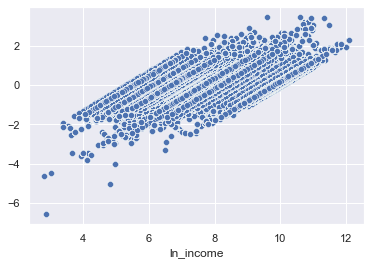

In [98]:
# ordonnée : le résidus
#  abscisse : variable endogène
sns.scatterplot(x='ln_income', y=ln_res_mj_gj.resid, data=df_sample_pays_ind)

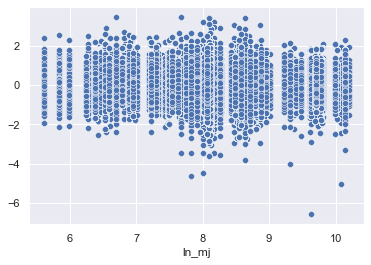

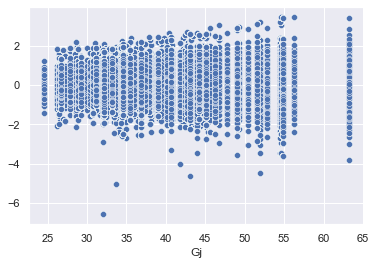

In [99]:
# exogene VS residu
# voir les points bizarres
variable = ['ln_mj', 'Gj']
for var in variable:
    sns.scatterplot(x = var, y = ln_res_mj_gj.resid , data=df_sample_pays_ind)
    plt.show()

#### Comparaison des 2 régressions (R²) (sans log VS log)

In [100]:
# n = df_sample_pays_ind.shape[0]
# p=3 
# q=2
# F = ((res_mj_gj.rsquared - ln_res_mj_gj.rsquared)/q)/ ((1-res_mj_gj.rsquared)/(n-p-1))
# F

In [101]:
# # p_value
# p=3
# q=2
# from scipy.stats import f
# print(1-f.cdf(F,q, n-p -1))

In [102]:
# R = np.array([[0,1,0],[0,0,1]])
# res_mj_gj.f_test(R)

>### Améliorez le modèle précédent en incluant maintenant la classe de revenu des parents  
>- Quel est le pourcentage de variance expliquée par ce nouveau modèle ?
<a class="anchor" id="cparents"></a>

#### Régression sans log (classe parent ) <a class="anchor" id="sans_log_cparents"></a>

In [103]:
df_sample_pays_ind.head(1)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj,residu_s
0,Albania,ALB,3146.2292,0.535604,19.0,2994.829902,30.0,8.05396,8.004643,138.259626


In [104]:
# variable cible : income
# variables explicatives : mj, Gj et c_i_parent
# instantation de l'objet régression
reg_mj_gj_c_i_parent = smf.ols("income ~ mj+Gj+c_i_parent", data = df_sample_pays_ind)
# estimation des paramètres
res_mj_gj_c_i_parent = reg_mj_gj_c_i_parent.fit()

In [105]:
print(res_mj_gj_c_i_parent.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                 2.129e+05
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:14:06   Log-Likelihood:            -5.9146e+06
No. Observations:              580000   AIC:                         1.183e+07
Df Residuals:                  579996   BIC:                         1.183e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2640.9424     49.392    -53.469      0.0

Remarque :
- R² = R²ajusté = 0.524 : l'ajout de la classe de revenu des parents a amélioré le modèle de régression.
- toutes les variables sont significatives au seuil de 5% (sauf Gj)
- Prob (F-statistic): 0 => au seuil de 5%, le modèle est globalement significatif 

#### Analyses complémentaires (classe parent )
#### Recherche des points atypiques <a class="anchor" id="sans_log_atyp_cp"></a>

- paramètres

In [106]:
df_sample_pays_ind.head(1)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj,residu_s
0,Albania,ALB,3146.2292,0.535604,19.0,2994.829902,30.0,8.05396,8.004643,138.259626


In [107]:
alpha = 0.05                    # seuil de sigificativité
n = df_sample_pays_ind.shape[0] # nombre d'observations
p = 4                           # nombre de variables

- création d'un dataframe qui récupère les analyses

In [108]:
analyses =  pd.DataFrame({'obs' :np.arange(1, n+1), 'country' : df_sample_pays_ind.country})

In [109]:
# analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

#### Calcul des leviers (classe parent ) <a class="anchor" id="sans_log_levier"></a>

In [110]:
df_sample_pays_ind.shape

(580000, 10)

In [111]:
analyses['levier'] = res_mj_gj_c_i_parent.get_influence().hat_matrix_diag
seuil_levier = 2*p/n

In [112]:
seuil_levier

1.3793103448275862e-05

In [113]:
analyses['levier'].describe()

count    580000.000000
mean          0.000007
std           0.000004
min           0.000002
25%           0.000004
50%           0.000006
75%           0.000008
max           0.000026
Name: levier, dtype: float64

In [114]:
# plt.figure(figsize=(10,6))
# plt.bar(analyses['obs'], analyses['levier'])
# plt.xticks(np.arange(0, 0.000028, step=0.000005))
# plt.xlabel('Observation')
# plt.ylabel('Leviers')
# plt.plot([0, 0.000028], [seuil_levier, seuil_levier], color='r')
# plt.show()

In [115]:
#  Récupération des points dont le levier est supérieur au levier_seuil
points_atypiques_levier = analyses.loc[analyses['levier'] > seuil_levier, :]
points_atypiques_levier

,obs,country,levier
55003,55004,Brazil,0.000014
55016,55017,Brazil,0.000015
55022,55023,Brazil,0.000014
55023,55024,Brazil,0.000014
55026,55027,Brazil,0.000015
...,...,...,...
554995,554996,United States,0.000021
554996,554997,United States,0.000024
554997,554998,United States,0.000022
554998,554999,United States,0.000021


In [116]:
# pays points atypiques levier
list(points_atypiques_levier.country.unique())

['Brazil',
 'Canada',
 'Central African Republic',
 'Colombia',
 'Guatemala',
 'Honduras',
 'Iceland',
 'Luxembourg',
 'Norway',
 'South Africa',
 'United Kingdom',
 'United States']

In [117]:
print(f'Proportion de points atypiques pour les leviers : {round(points_atypiques_levier.shape[0]/ df_sample_pays_ind.shape[0] *100,2)} %')

Proportion de points atypiques pour les leviers : 5.68 %


####  Calcul des résidus studentisés (classe parent )
- le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté

In [118]:
analyses['rstudent'] = res_mj_gj_c_i_parent.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
seuil_rstudent

1.9599680747065151

In [119]:
analyses['rstudent'].describe()

count    5.800000e+05
mean     3.835620e-08
std      1.000004e+00
min     -4.116612e+00
25%     -3.171258e-01
50%     -7.369443e-02
75%      1.777796e-01
max      2.347850e+01
Name: rstudent, dtype: float64

In [120]:
#  Récupération des points atypiques pour les résidus studentisés
points_atypiques_rstudent = analyses.loc[analyses['rstudent'] > seuil_rstudent, :]
points_atypiques_rstudent

,obs,country,levier,rstudent
36,37,Albania,0.000007,1.970626
211,212,Albania,0.000005,2.118524
233,234,Albania,0.000007,1.987059
392,393,Albania,0.000005,2.208906
398,399,Albania,0.000005,2.381456
...,...,...,...,...
564478,564479,"Venezuela, RB",0.000008,2.950806
564505,564506,"Venezuela, RB",0.000008,2.975456
564514,564515,"Venezuela, RB",0.000008,2.983672
564578,564579,"Venezuela, RB",0.000008,2.983672


In [121]:
# pays points atypiques résidus studentisés
list(points_atypiques_rstudent.country.unique())

['Albania',
 'Argentina',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Honduras',
 'Hungary',
 'Iceland',
 'Iran, Islamic Rep.',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea, Rep.',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'Nicaragua',
 'North Macedonia',
 'Norway',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Serbia',
 'Slovak Republic',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Taïwan',
 'Thailand',
 'Turkey',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Venezuela, RB']

In [122]:
print(f'Proportion de points atypiques pour les résidus stundentisés : {round(points_atypiques_rstudent.shape[0]/ df_sample_pays_ind.shape[0] *100,2)} %')

Proportion de points atypiques pour les résidus stundentisés : 2.48 %


#### Distance de Cook (classe parent )

In [123]:
# influence = res_mj_gj_c_i_parent.get_influence().summary_frame()
influence_parent = res_mj_gj_c_i_parent.get_influence()
influence_parent

Le seuil de la distance de Cook est de n-p. 

In [124]:
# atypisme en fonction de la distance de cook
cook = influence_parent.cooks_distance
print("valeurs cooks_distance : \n", cook)

valeurs cooks_distance : 
 (array([1.29202453e-07, 1.63505785e-07, 4.50342128e-10, ...,
       1.86730606e-07, 7.57430699e-08, 2.52188825e-07]), array([1., 1., 1., ..., 1., 1., 1.]))


In [125]:
analyses['dcooks'] = cook[0]

In [126]:
analyses['dcooks']
seuil_dcook = 4/(n-p)

In [127]:
#  Récupération des points atypiques pour la distance de cook
points_atypiques_cook = analyses.loc[analyses['dcooks'] > seuil_dcook, :]
points_atypiques_cook

,obs,country,levier,rstudent,dcooks
36,37,Albania,0.000007,1.970626,0.000007
186,187,Albania,0.000009,1.872028,0.000008
233,234,Albania,0.000007,1.987059,0.000007
398,399,Albania,0.000005,2.381456,0.000007
456,457,Albania,0.000007,1.987059,0.000007
...,...,...,...,...,...
564478,564479,"Venezuela, RB",0.000008,2.950806,0.000018
564505,564506,"Venezuela, RB",0.000008,2.975456,0.000017
564514,564515,"Venezuela, RB",0.000008,2.983672,0.000017
564578,564579,"Venezuela, RB",0.000008,2.983672,0.000017


In [128]:
# pays points atypiques distance de Cook
list(points_atypiques_cook.country.unique())

['Albania',
 'Argentina',
 'Austria',
 'Belgium',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Honduras',
 'Hungary',
 'Iceland',
 'Iran, Islamic Rep.',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea, Rep.',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'Nicaragua',
 'North Macedonia',
 'Norway',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Serbia',
 'Slovak Republic',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Taïwan',
 'Thailand',
 'Turkey',
 'United Kingdom',
 'United States',
 'Uruguay',
 'Venezuela, RB']

In [129]:
print(f'Proportion de points atypiques pour la distance de Cook : {round(points_atypiques_cook.shape[0]/ df_sample_pays_ind.shape[0] *100,2)} %')

Proportion de points atypiques pour la distance de Cook : 4.66 %


Nombre total de points atypiques (classe parent )

In [130]:
# https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
from functools import reduce
data_frames = [points_atypiques_levier, points_atypiques_rstudent, points_atypiques_cook]
df_points_atypiques = reduce(lambda  left,right: pd.merge(left,right,on=['obs'],
                                            how='outer'), data_frames)

In [131]:
# #  autre méthode de récupération des points atypiques
# result = pd.concat(data_frames)
# points_atypiques = result.obs.nunique()

In [132]:
df_points_atypiques.shape

(47660, 10)

In [133]:
df_points_atypiques.obs.sort_values()

32934        37
43586       187
32935       212
32936       234
32937       393
          ...  
43581    564479
43582    564506
43583    564515
43584    564579
43585    564627
Name: obs, Length: 47660, dtype: int64

In [134]:
print(f'Proportion de points atypiques au total : {round(df_points_atypiques.shape[0]/ df_sample_pays_ind.shape[0] *100,2)} %')

Proportion de points atypiques au total : 8.22 %


#### Colinéarité des variables (classe parent ) <a class="anchor" id="sans_log_colin"></a>

In [135]:
variables = res_mj_gj_c_i_parent.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.1371063306654345, 1.1371019782597336, 1.0000056093650773]

Remarque : tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

#### Variance des résidus (classe parent ) <a class="anchor" id="sans_log_var_res"></a>
- on applique un test d' hétéroscédasticité de Breusch Pagan
    - H0 : variances égales(homoscédasticité)
    - H1 : variances différentes (hétéroscédasticité)
    - seuil alpha : 0.05

In [136]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(res_mj_gj_c_i_parent.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


Remarque : la p_value est inférieure au seuil de 5%. L'hypothèse null de la constance des variables est rejetée. Les variables ont des variances différentes

#### Normalité des résidus (classe parent ) <a class="anchor" id="sans_log_norm_res_cp"></a>
- test de Kolmogorov_Smirnov

In [137]:
residus_parent = res_mj_gj_c_i_parent.resid
ks_2samp_test(residus_parent)

p_value :1.3995463166552973e-48


'HO rejetée au seuil alpha, la variable résidu ne suit pas une loi normale'

Remarque : vu le nombre important d'observations, les résidus sont considérés comme suivant un loi normale (TCL)

Droite de Henry - QQplot 

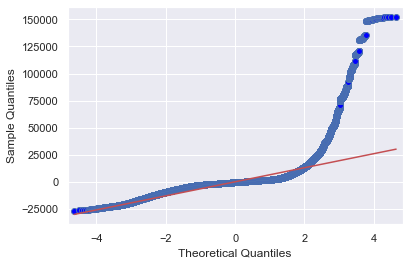

In [138]:
# sm.qqplot(res_mj_gj.resid)
res_mj_gj_c_i_parent_res = res_mj_gj_c_i_parent.resid
fig = sm.qqplot(res_mj_gj_c_i_parent_res, line='s')
plt.show()

### Régression avec log (classe parent ) <a class="anchor" id="log_reg_cp"></a>

In [139]:
# variable cible : ln_income
# variables explicatives : ln_mj, Gj et c_i_parent
# instantation de l'objet régression
ln_reg_mj_gj_c_i_parent = smf.ols("ln_income ~ ln_mj+Gj+ c_i_parent", data = df_sample_pays_ind)
# estimation des paramètres
ln_res_mj_gj_c_i_parent = ln_reg_mj_gj_c_i_parent.fit()

In [140]:
ln_res_mj_gj_c_i_parent = smf.ols("ln_income ~ ln_mj+Gj+c_i_parent", data = df_sample_pays_ind).fit()
print(ln_res_mj_gj_c_i_parent.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 7.035e+05
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:14:12   Log-Likelihood:            -5.6554e+05
No. Observations:              580000   AIC:                         1.131e+06
Df Residuals:                  579996   BIC:                         1.131e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0739      0.008     -8.736      0.0

Remarque :
- R² = R²ajusté = 0.784 : l'ajout de la classe de revenu des parents et les logs a amélioré le modèle de régression.
- toutes les variables sont sigificatives au seul de 5%
- Prob (F-statistic): 0 => au seuil de 5%, le modèle est globalement significatif 
- ce modèle est le meilleur jusqu'à présent

In [141]:
print('la variance de ln_income est expliquée à {}% par le modèle'.format(round(ln_res_mj_gj_c_i_parent.rsquared * 100,2)))

la variance de ln_income est expliquée à 78.44% par le modèle


In [142]:
ln_res_mj_gj_c_i_parent_anova= sm.stats.anova_lm(ln_res_mj_gj_c_i_parent, typ=1)
ln_res_mj_gj_c_i_parent_anova

,df,sum_sq,mean_sq,F,PR(>F)
ln_mj,1.0,795723.619705,795723.619705,1.933326e+06,0.0
Gj,1.0,10787.187015,10787.187015,2.620904e+04,0.0
c_i_parent,1.0,62193.767101,62193.767101,1.511088e+05,0.0
Residual,579996.0,238716.295815,0.411583,NaN,NaN


In [143]:
# Calcul du R2 pour la variable 'ln_mj'
r2_ln_mj = ln_res_mj_gj_c_i_parent_anova.sum_sq['ln_mj'] / ln_res_mj_gj_c_i_parent_anova['sum_sq'].sum()
print('la variable ln_mj explique {} % de la variance ln_income' .format(round(r2_ln_mj*100,2)))

la variable ln_mj explique 71.85 % de la variance ln_income


In [144]:
# Calcul du R2 pour la variable 'Gj'
r2_ln_Gj = ln_res_mj_gj_c_i_parent_anova.sum_sq['Gj'] / ln_res_mj_gj_c_i_parent_anova['sum_sq'].sum()
print('la variable Gj explique {} % de la variance ln_income' .format(round(r2_ln_Gj*100,2)))

la variable Gj explique 0.97 % de la variance ln_income


In [145]:
# Calcul du R2 pour la variable 'c_i_parent'
r2_ln_c_i_parent = ln_res_mj_gj_c_i_parent_anova.sum_sq['c_i_parent'] / ln_res_mj_gj_c_i_parent_anova['sum_sq'].sum()
print('la variable c_i_parent explique {} % de la variance ln_income' .format(round(r2_ln_c_i_parent*100,2)))

la variable c_i_parent explique 5.62 % de la variance ln_income


In [146]:
#  vérification
r2_ln_mj + r2_ln_Gj + r2_ln_c_i_parent, ln_res_mj_gj_c_i_parent.rsquared

(0.7844394102007968, 0.7844394102008153)

#### Linéarité

In [147]:
df_sample_pays_ind

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj,residu_s
0,Albania,ALB,3146.22920,0.535604,19.0,2994.829902,30.0,8.053960,8.004643,138.259626
1,Albania,ALB,1636.65930,0.535604,68.0,2994.829902,30.0,7.400412,8.004643,-1371.310274
2,Albania,ALB,728.89795,0.535604,6.0,2994.829902,30.0,6.591534,8.004643,-2279.071624
3,Albania,ALB,1821.85380,0.535604,80.0,2994.829902,30.0,7.507610,8.004643,-1186.115774
4,Albania,ALB,3747.26760,0.535604,99.0,2994.829902,30.0,8.228782,8.004643,739.298026
...,...,...,...,...,...,...,...,...,...,...
579995,"Yemen, Rep.",YEM,642.31134,0.816695,22.0,1042.635870,39.0,6.465073,6.949507,-400.274657
579996,"Yemen, Rep.",YEM,786.60210,0.816695,29.0,1042.635870,39.0,6.667723,6.949507,-255.983897
579997,"Yemen, Rep.",YEM,942.47687,0.816695,91.0,1042.635870,39.0,6.848511,6.949507,-100.109127
579998,"Yemen, Rep.",YEM,1544.07260,0.816695,88.0,1042.635870,39.0,7.342179,6.949507,501.486603


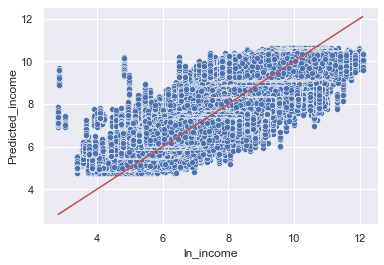

In [148]:
# Plot Predicted values VS Real values
df_sample_pays_ind['Predicted_income'] = ln_res_mj_gj_c_i_parent.predict()
X_plot = [df_sample_pays_ind['ln_income'].min(), df_sample_pays_ind['ln_income'].max()]
ax = sns.scatterplot(x="ln_income", y="Predicted_income", data=df_sample_pays_ind)
ax.set(xlabel='ln_income', ylabel='Predicted_income')
plt.plot(X_plot, X_plot, color='r')
plt.show()

Test de Harvey Collier

In [149]:
# import statsmodels.stats.api as sms
# sms.linear_harvey_collier(ln_res_mj_gj_c_i_parent)

#### Analyses complémentaires (log - classe parent )
#### Recherche des points atypiques 
<a class="anchor" id="log_pts_aty_cp"></a>

- paramètres

In [150]:
alpha = 0.05                    # seuil de sigificativité
n = df_sample_pays_ind.shape[0] # nombre d'observations
p = 4                           # nombre de variables

- création d'un dataframe qui récupère les analyses

In [151]:
ln_analyses =  pd.DataFrame({'obs' :np.arange(1, n+1), 'country' : df_sample_pays_ind.country})

In [152]:
ln_analyses.shape

(580000, 2)

In [153]:
ln_analyses.head(1)

,obs,country
0,1,Albania


#### Calcul des leviers (classe parent - log )

In [154]:
ln_analyses['levier_ln'] = ln_res_mj_gj_c_i_parent.get_influence().hat_matrix_diag
seuil_levier_ln = 2 * p / n

In [155]:
ln_analyses

,obs,country,levier_ln
0,1,Albania,0.000006
1,2,Albania,0.000004
2,3,Albania,0.000008
3,4,Albania,0.000005
4,5,Albania,0.000008
...,...,...,...
579995,579996,"Yemen, Rep.",0.000005
579996,579997,"Yemen, Rep.",0.000004
579997,579998,"Yemen, Rep.",0.000007
579998,579999,"Yemen, Rep.",0.000006


In [156]:
print('seuil_levier_ln : ' , seuil_levier_ln)

seuil_levier_ln :  1.3793103448275862e-05


In [157]:
ln_analyses.describe()

,obs,levier_ln
count,580000.000000,580000.000000
mean,290000.500000,0.000007
std,167431.722402,0.000003
min,1.000000,0.000002
25%,145000.750000,0.000005
50%,290000.500000,0.000006
75%,435000.250000,0.000009
max,580000.000000,0.000028


In [158]:
#  récupération des points atypiques par levier
points_atypiques_levier_ln = ln_analyses.loc[ln_analyses['levier_ln'] > seuil_levier_ln, :]
points_atypiques_levier_ln

,obs,country,levier_ln
55002,55003,Brazil,0.000014
55003,55004,Brazil,0.000015
55010,55011,Brazil,0.000014
55013,55014,Brazil,0.000015
55016,55017,Brazil,0.000016
...,...,...,...
529956,529957,Timor-Leste,0.000014
529967,529968,Timor-Leste,0.000014
529984,529985,Timor-Leste,0.000014
529989,529990,Timor-Leste,0.000014


In [159]:
# pays points atypiques levier
list(points_atypiques_levier_ln.country.unique())

['Brazil',
 'Central African Republic',
 'Colombia',
 'Congo, Dem. Rep.',
 'Eswatini',
 'Guatemala',
 'Honduras',
 'Kenya',
 'Panama',
 'South Africa',
 'Timor-Leste']

In [160]:
print(f'Proportion de points atypiques pour les leviers (avec log): {round(points_atypiques_levier_ln.shape[0]/ df_sample_pays_ind.shape[0] *100,2)} %')

Proportion de points atypiques pour les leviers (avec log): 2.04 %


Remarque : la proportion de points atypiques est plus faible avec les logs (5.58% VS 2.04%)

####  Calcul des résidus studentisés (classe parent  - log)
- le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté

In [161]:
ln_analyses['rstudent_ln'] = ln_res_mj_gj_c_i_parent.get_influence().resid_studentized_internal
seuil_rstudent_ln = t.ppf(1-alpha/2, n-p-1)

In [162]:
print('seuil_rstudent_ln : ', seuil_rstudent_ln)

seuil_rstudent_ln :  1.9599680747065151


In [163]:
ln_analyses['rstudent_ln'].describe()

count    5.800000e+05
mean    -3.592763e-08
std      1.000001e+00
min     -1.062224e+01
25%     -6.010314e-01
50%     -1.040112e-02
75%      5.936162e-01
max      5.648302e+00
Name: rstudent_ln, dtype: float64

In [164]:
#  Récupération des points atypiques pour les résidus stundentisés
points_atypiques_rstudent_ln = ln_analyses.loc[ln_analyses['rstudent_ln'] > seuil_rstudent_ln, :]
points_atypiques_rstudent_ln

,obs,country,levier_ln,rstudent_ln
36,37,Albania,0.000006,2.331241
186,187,Albania,0.000008,2.118928
211,212,Albania,0.000004,2.649711
222,223,Albania,0.000004,2.017455
233,234,Albania,0.000006,2.366627
...,...,...,...,...
579784,579785,"Yemen, Rep.",0.000006,1.985282
579844,579845,"Yemen, Rep.",0.000004,2.450225
579862,579863,"Yemen, Rep.",0.000008,3.010897
579887,579888,"Yemen, Rep.",0.000005,2.056053


In [165]:
# pays points atypiques résidus studentisés
list(points_atypiques_rstudent_ln.country.unique())

['Albania',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Congo, Dem. Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Rep.',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Korea, Rep.',
 'Kosovo',
 'Kyrgyz Republic',
 'Lao PDR',
 'Latvia',
 'Liberia',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 '

In [166]:
print(f'Proportion de points atypiques pour les résidus stundentisés (avec log): {round(points_atypiques_rstudent_ln.shape[0]/ df_sample_pays_ind.shape[0] *100,2)} %')

Proportion de points atypiques pour les résidus stundentisés (avec log): 2.76 %


Remarque : la proportion de points atypiques pour les résidus stundentisés est faiblement supérieure avec les logs que sans (2.76% VS 2.48%)

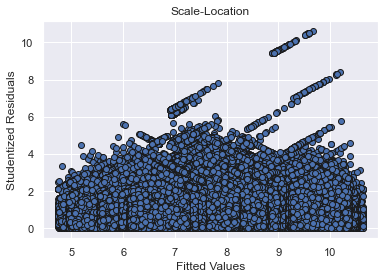

In [167]:
# # Get the Studentized Residual
fitted = ln_res_mj_gj_c_i_parent.predict()
student_residuals = pd.Series(np.abs(ln_res_mj_gj_c_i_parent.get_influence().resid_studentized_internal))# Plot the Studentized Residual
fig, ax = plt.subplots()
ax.scatter(fitted, student_residuals, edgecolors = 'k')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
plt.show()

#### Distance de Cook (classe parent  - log)

In [168]:
# influence = res_mj_gj_c_i_parent.get_influence().summary_frame()
influence_parent_ln = ln_res_mj_gj_c_i_parent.get_influence()
influence_parent_ln

Le seuil de la distance de Cook est  n-p

In [169]:
# atypisme en fonction de la distance de cook
cook_ln = influence_parent_ln.cooks_distance
print("valeurs cooks_distance : \n", cook_ln)

valeurs cooks_distance : 
 (array([9.77858130e-07, 1.14390507e-06, 2.80361845e-06, ...,
       3.41156561e-07, 2.29954711e-07, 5.53763757e-07]), array([1., 1., 1., ..., 1., 1., 1.]))


In [170]:
# incorporation des données dans le dataset " ln_analyses"
ln_analyses['dcooks_ln'] = cook_ln[0]

In [171]:
ln_analyses['dcooks_ln'].describe()

count    5.800000e+05
mean     1.944567e-06
std      5.688469e-06
min      6.431128e-17
25%      1.155469e-07
50%      5.381327e-07
75%      1.751053e-06
max      2.228956e-04
Name: dcooks_ln, dtype: float64

In [172]:
seuil_dcook_ln = 4/(n-p)
print('seuil_dcook_ln : ', seuil_dcook_ln)

seuil_dcook_ln :  6.896599286891634e-06


In [173]:
#  Récupération des points atypiques pour la distance de Cook
points_atypiques_dcooks_ln = ln_analyses.loc[ln_analyses['dcooks_ln'] > seuil_dcook_ln, :]
points_atypiques_dcooks_ln

,obs,country,levier_ln,rstudent_ln,dcooks_ln
36,37,Albania,0.000006,2.331241,0.000009
186,187,Albania,0.000008,2.118928,0.000009
211,212,Albania,0.000004,2.649711,0.000007
233,234,Albania,0.000006,2.366627,0.000008
392,393,Albania,0.000004,2.844332,0.000007
...,...,...,...,...,...
579593,579594,"Yemen, Rep.",0.000006,3.187824,0.000015
579614,579615,"Yemen, Rep.",0.000008,2.975512,0.000018
579625,579626,"Yemen, Rep.",0.000007,3.063975,0.000017
579862,579863,"Yemen, Rep.",0.000008,3.010897,0.000017


In [174]:
# pays points atypiques distance de Cook
list(points_atypiques_dcooks_ln.country.unique())

['Albania',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Congo, Dem. Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Rep.',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Korea, Rep.',
 'Kosovo',
 'Kyrgyz Republic',
 'Lao PDR',
 'Latvia',
 'Liberia',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mexico',
 'Moldova',
 'Mongolia',
 'Montenegro',
 '

In [175]:
print(f'Proportion de points atypiques pour la distance de Cook (avec log): {round(points_atypiques_dcooks_ln.shape[0]/ df_sample_pays_ind.shape[0] *100,2)} %')

Proportion de points atypiques pour la distance de Cook (avec log): 5.62 %


Remarque : la proportion de points atypiques pour pour la distance de Cook (avec log) est  supérieure avec les logs que sans (5.62% VS 4.66%)

Nombre total de points atypiques avec classe parent et log

In [176]:
data_aty = [points_atypiques_levier_ln, points_atypiques_rstudent_ln]
res_aty = pd.concat(data_aty)

In [177]:
# récupération des points atypiques
data_frames = [points_atypiques_levier_ln, points_atypiques_rstudent_ln, points_atypiques_dcooks_ln]
result_ln = pd.concat(data_frames)
df_points_atypiques_ln = result_ln.obs.nunique()
df_points_atypiques_ln

42875

Remarque : les log ont permis de réduire le nombre total de points atypiques (42875 VS 47660)

In [178]:
print(f'Proportion de points atypiques au total avec classe parent et log : {round(df_points_atypiques_ln / df_sample_pays_ind.shape[0] *100,2)} %')

Proportion de points atypiques au total avec classe parent et log : 7.39 %


Remarque : la proportion des points atypiques est donc diminuée avec l'utilisation des log (7.39% VS 8.22%)

####  Colinéarité des variables (classe parent -log)<a class="anchor" id="log_colin_cp"></a>

In [179]:
variables_ln = ln_res_mj_gj_c_i_parent.model.exog
[variance_inflation_factor(variables_ln, i) for i in np.arange(1,variables_ln.shape[1])]

[1.0770924216781608, 1.0770883905033588, 1.0000057325740432]

Remarque : tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

#### Autre calcul pour les VIF (colinéarité des variables)

In [180]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant# For each X, calculate VIF and save in dataframe
calc_vif = df_sample_pays_ind[['ln_mj', 'Gj',  'c_i_parent']]
X = add_constant(calc_vif)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1) #inspect results

,VIF Factor,features
0,100.8,const
1,1.1,ln_mj
2,1.1,Gj
3,1.0,c_i_parent


In [181]:
# import statsmodels.tsa.api as smt
# acf = smt.graphics.plot_acf(ln_res_mj_gj_c_i_parent.resid, alpha=0.05)

Remarque : toutes les valeurs sont dans l'intervalle de confiance. Pas d'autocorrélation partielle statistiquement significative

#### Variance des résidus (classe parent - log) <a class="anchor" id="log_var_res_cp"></a>
- on applique un test d' hétéroscédasticité de Breusch Pagan
    - H0 : variances constantes (homoscédasticité)
    - H1 : variances différentes (hétéroscédasticité)
    - seuil alpha : 0.05

In [182]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(ln_res_mj_gj_c_i_parent.resid, variables_ln)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


Remarque : la p_value est inférieure au seuil de 5%. L'hypothèse null de la constance des variables est rejetée. Les variables ont des variances différentes

#### Normalité des résidus (classe parent )<a class="anchor" id="log_norm_res_cp"></a>
- test de Kolmogorov_Smirnov
 - HO : la variable suit une loi normale
 - H1 : la variable ne suit pas une loi normale

In [183]:
residus_parent_ln = ln_res_mj_gj_c_i_parent.resid
ks_2samp_test(residus_parent_ln)

p_value :0.07170091706080373


'HO ne peut pas être rejetée au seuil alpha, la variable residu suit une loi NORMALE'

Remarque : compte tenu du nombre élevé de résidus, on peut estimer la normalité de la variable (application du TLC)

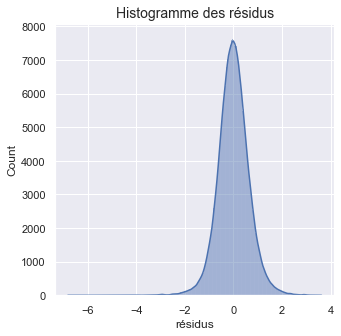

In [184]:
# visualisation des résidus
fig = plt.figure(figsize=(5,5))
sns.histplot(x = ln_res_mj_gj_c_i_parent.resid,  kde=True)
plt.xlabel("résidus", size=12)
plt.title("Histogramme des résidus", size=14)
plt.show()

Remarque : 
- l'histogramme montre bien un centrage autour de 0 et une symétrie
- les résidus semblent suivre une loi gaussienne

In [185]:
df_sample_pays_ind.head(1)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj,residu_s,Predicted_income
0,Albania,ALB,3146.2292,0.535604,19.0,2994.829902,30.0,8.05396,8.004643,138.259626,7.516933


In [186]:
# la somme des résidus est nulle
ln_res_mj_gj_c_i_parent.resid.sum()

5.608931701317488e-07

In [187]:
#  variance résiduelle
1/n-p * ((ln_res_mj_gj_c_i_parent.resid**2).sum())

-954865.1832570009

#### Autre visualisation de la normalité des résidus
- droite de Henry, QQPlot

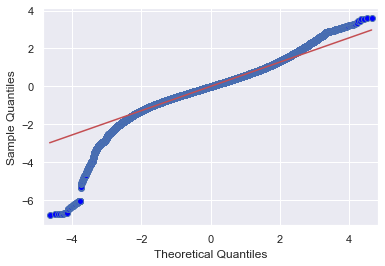

In [188]:
# sm.qqplot(res_mj_gj.resid)
res_mj_gj_c_i_parent_res_ln = ln_res_mj_gj_c_i_parent.resid
fig = sm.qqplot(res_mj_gj_c_i_parent_res_ln, line='s')
plt.show()

Remarque : la droite de Henry est un peu plus rectiligne avec les logs que sans.

>### En observant le coefficient de régression associé à l’indice de Gini, peut-on affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise ?
<a class="anchor" id="question_supp"></a>


In [189]:
df_sample_pays_ind.head(5)

,country,country_code,income,pj,c_i_parent,mj,Gj,ln_income,ln_mj,residu_s,Predicted_income
0,Albania,ALB,3146.22920,0.535604,19.0,2994.829902,30.0,8.053960,8.004643,138.259626,7.516933
1,Albania,ALB,1636.65930,0.535604,68.0,2994.829902,30.0,7.400412,8.004643,-1371.310274,8.073123
2,Albania,ALB,728.89795,0.535604,6.0,2994.829902,30.0,6.591534,8.004643,-2279.071624,7.369373
3,Albania,ALB,1821.85380,0.535604,80.0,2994.829902,30.0,7.507610,8.004643,-1186.115774,8.209332
4,Albania,ALB,3747.26760,0.535604,99.0,2994.829902,30.0,8.228782,8.004643,739.298026,8.424998


In [190]:
ln_res_mj_gj_c_i_parent = smf.ols("ln_income ~ ln_mj+Gj+c_i_parent", data = df_sample_pays_ind).fit()
print(ln_res_mj_gj_c_i_parent.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 7.035e+05
Date:                Tue, 28 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:14:48   Log-Likelihood:            -5.6554e+05
No. Observations:              580000   AIC:                         1.131e+06
Df Residuals:                  579996   BIC:                         1.131e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0739      0.008     -8.736      0.0

Remarque : 
- le coefficient de Gj est significatif au seuil alpha de 5%
- le coefficient de Gj est **proche de 0** et négatif => le revenu décroit quant l'indice de Gini croît (plus il y a d'inégalité (Gf croît) et plus le revenu décroît mais avec un coef proche de 0, le résultat n'est pas pertinent (car proche de 0).

In [191]:
#  pays égalitaire
a_prevoir = pd.DataFrame({ 'ln_mj': 8, 'Gj': 0.1,'c_i_parent': 100}, index=[0])
ln_income_prev = ln_res_mj_gj_c_i_parent.predict(a_prevoir)
print(round(ln_income_prev[0], 2))

8.96


In [192]:
#  pays inégalitaire
a_prevoir = pd.DataFrame({ 'ln_mj': 8, 'Gj': 0.9,'c_i_parent': 100}, index=[0])
ln_income_prev = ln_res_mj_gj_c_i_parent.predict(a_prevoir)
print('ln_income prédit (classe forte - gini fort) : {} '.format(round(ln_income_prev[0], 2))

8.95


In [224]:
#  pays inégalitaire et classe parent forte
a_prevoir = pd.DataFrame({ 'ln_mj': 8, 'Gj': 0.9,'c_i_parent': 100}, index=[0])
ln_income_prev = ln_res_mj_gj_c_i_parent.predict(a_prevoir)
print('ln_income prédit (classe forte - gini fort) : {} '.format(round(ln_income_prev[0], 2)))

ln_income prédit (classe forte - gini fort) : 8.95 


In [225]:
#  pays inégalitaire et classe parent faible
a_prevoir = pd.DataFrame({ 'ln_mj': 8, 'Gj': 0.9,'c_i_parent': 1}, index=[0])
ln_income_prev = ln_res_mj_gj_c_i_parent.predict(a_prevoir)
print('ln_income prédit (classe faible - gini fort) : {} '.format(round(ln_income_prev[0], 2)))

ln_income prédit (classe faible - gini fort) : 7.82 


Remarque : le coefficient de régression associé à l’indice de Gini ne peut pas d'affirmer que le fait de vivre dans un pays plus inégalitaire favorise plus de personnes qu’il n’en défavorise

### Juste pour voir <a class="anchor" id="juste_voir"></a>
#### Visualisation des leviers modèle classe Parents, Log

#### Nouvel échantillonnage du dataset pour gagner du temps de chargement
 - regroupement des données par pays et moyenne sur des paramètres

In [195]:
ln_analyses.head(5)

,obs,country,levier_ln,rstudent_ln,dcooks_ln
0,1,Albania,0.000006,0.837083,9.778581e-07
1,2,Albania,0.000004,-1.048577,1.143905e-06
2,3,Albania,0.000008,-1.212447,2.803618e-06
3,4,Albania,0.000005,-1.093800,1.594206e-06
4,5,Albania,0.000008,-0.305849,1.964500e-07


In [196]:
vis_data = ln_analyses.groupby('country').mean().reset_index()

In [197]:
vis_data = ln_analyses.groupby(by=["country"]).mean().reset_index()

In [198]:
vis_data.describe()

,obs,levier_ln,rstudent_ln,dcooks_ln
count,116.000000,116.000000,1.160000e+02,1.160000e+02
mean,290000.500000,0.000007,-3.592763e-08,1.944567e-06
std,168151.717208,0.000003,7.755651e-02,2.233557e-06
min,2500.500000,0.000003,-3.111840e-01,5.561330e-07
25%,146250.500000,0.000005,-3.115239e-02,9.690397e-07
50%,290000.500000,0.000006,7.891445e-03,1.331530e-06
75%,433750.500000,0.000008,4.872348e-02,1.983564e-06
max,577500.500000,0.000024,1.779251e-01,2.076462e-05


In [199]:
seuil_levier_ln

1.3793103448275862e-05

#### Visualisation des leviers <a class="anchor" id="vis_levier"></a>

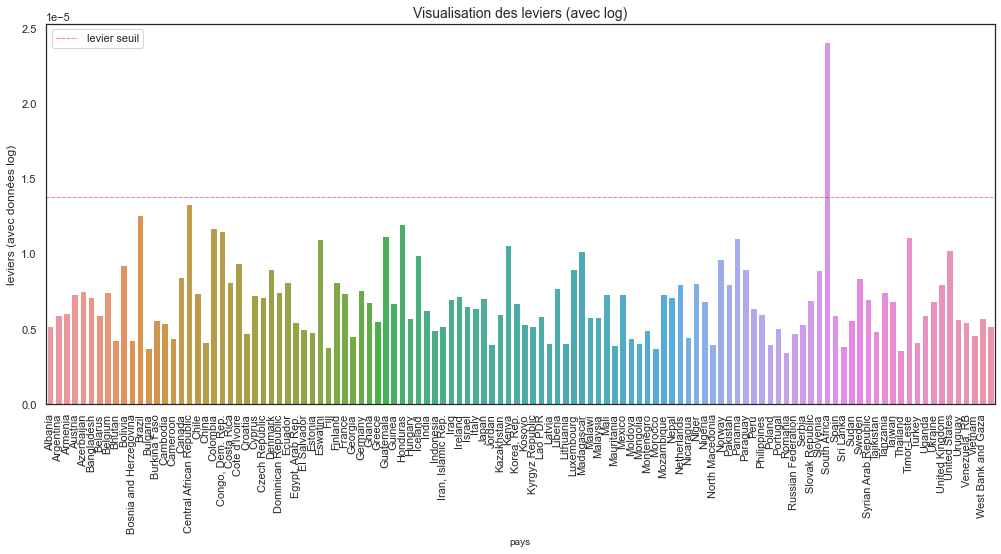

In [200]:
# Visualisation par barplot des leviers
sns.set_style("white")
fig = plt.figure(figsize=(17,7))
sns.barplot(x='country', y= 'levier_ln', data=vis_data)
plt.xticks(np.arange(0, 115, step=1), rotation=90)
plt.xlabel('pays', size=10)
plt.ylabel('leviers (avec données log)', size=12)
plt.title("Visualisation des leviers (avec log)", size=14)
plt.axhline(y=seuil_levier_ln, c='red',linestyle='dashdot', lw=0.5, label='levier seuil') 
# plt.plot([0, 115], [seuil_levier_ln, seuil_levier_ln], color='r')
plt.legend(loc='upper left')
# plt.savefig("Visualisation des leviers.jpg")
plt.show()

In [201]:
vis_data.loc[vis_data['levier_ln'] > seuil_levier_ln, :]

,country,obs,levier_ln,rstudent_ln,dcooks_ln
95,South Africa,477500.5,0.000024,-0.311184,0.000021


Remarque : l'Afrique du Sud est un point atypique

#### Visualisation des résidus studentisés <a class="anchor" id="vis_res_stud"></a>

In [202]:
vis_data.describe()

,obs,levier_ln,rstudent_ln,dcooks_ln
count,116.000000,116.000000,1.160000e+02,1.160000e+02
mean,290000.500000,0.000007,-3.592763e-08,1.944567e-06
std,168151.717208,0.000003,7.755651e-02,2.233557e-06
min,2500.500000,0.000003,-3.111840e-01,5.561330e-07
25%,146250.500000,0.000005,-3.115239e-02,9.690397e-07
50%,290000.500000,0.000006,7.891445e-03,1.331530e-06
75%,433750.500000,0.000008,4.872348e-02,1.983564e-06
max,577500.500000,0.000024,1.779251e-01,2.076462e-05


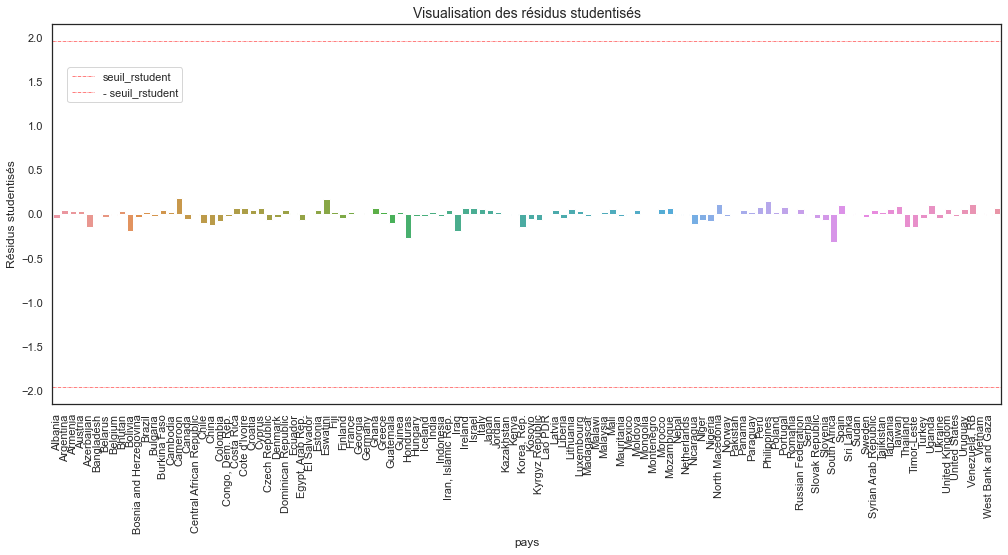

In [204]:
sns.set_style("white")
fig = plt.figure(figsize=(17,7))
sns.barplot(x='country', y='rstudent_ln', data=vis_data)
plt.xticks(np.arange(0, 115, step=1), rotation=90)
plt.xlabel('pays', size=12)
plt.ylabel('Résidus studentisés', size=12)
plt.axhline(y=seuil_rstudent_ln, c='red',linestyle='dashdot', lw=0.5, label='seuil_rstudent') 
plt.axhline(y=-seuil_rstudent_ln, c='red',linestyle='dashdot', lw=0.5, label='- seuil_rstudent')
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.9))
plt.title("Visualisation des résidus studentisés", size=14)
# plt.savefig("Visualisation des résidus studentisés.jpg")
plt.show()

#### Visualisation de la distance de Cook <a class="anchor" id="vis_dcook"></a>

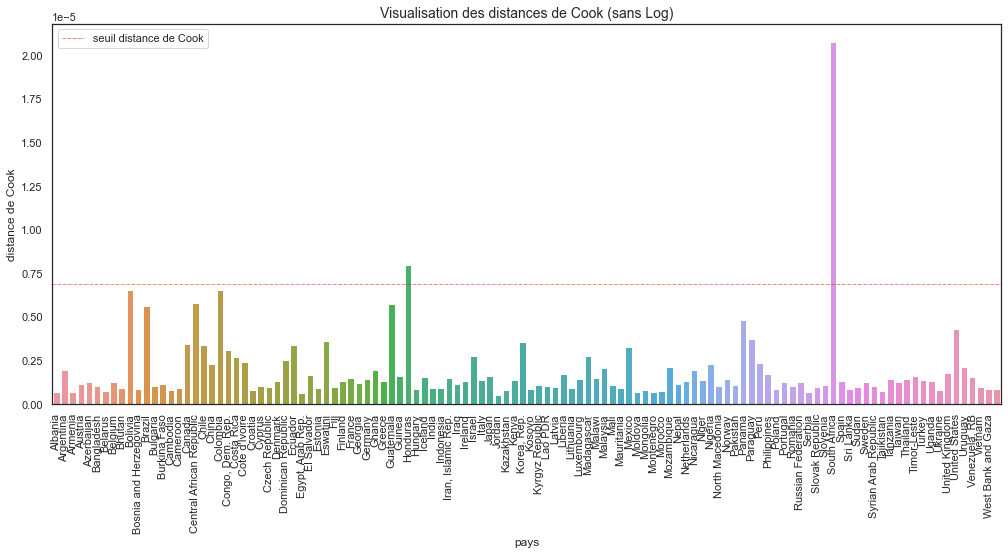

In [205]:
sns.set_style("white")
fig = plt.figure(figsize=(17,7))
sns.barplot(x='country', y='dcooks_ln', data=vis_data)
plt.xticks(np.arange(0, 115, step=1), rotation=90)
plt.xlabel('pays', size=12)
plt.ylabel('distance de Cook', size=12)
plt.title("Visualisation des distances de Cook (sans Log)", size=14)
plt.axhline(y=seuil_dcook_ln, c='red',linestyle='dashdot', lw=0.5, label='seuil distance de Cook')
plt.legend(loc='upper left')
# plt.savefig("Visualisation des distances de Cook.jpg")
plt.show()

In [206]:
vis_data.loc[vis_data['dcooks_ln'] > seuil_dcook_ln, :]

,country,obs,levier_ln,rstudent_ln,dcooks_ln
43,Honduras,217500.5,0.000012,-0.271023,0.000008
95,South Africa,477500.5,0.000024,-0.311184,0.000021


Remarque : l'Afrique du Sud et le Honduras sont des points atypiques

### Visualisation du modèle SANS log <a class="anchor" id="vis_sans_log"></a>

#### Visualisation des leviers modèle classe Parents, SANS Log <a class="anchor" id="levier_ss_log"></a>

In [207]:
analyses.head()

,obs,country,levier,rstudent,dcooks
0,1,Albania,0.000007,0.279864,1.292025e-07
1,2,Albania,0.000005,-0.355211,1.635058e-07
2,3,Albania,0.000009,0.014436,4.503421e-10
3,4,Albania,0.000006,-0.425293,2.872910e-07
4,5,Albania,0.000009,-0.284916,1.912935e-07


In [208]:
vis_data_sans_log = analyses.groupby('country').mean().reset_index()

In [209]:
vis_data_sans_log.shape

(116, 5)

In [210]:
n = vis_data_sans_log.shape[0]
p = 4

#### Visualisation des leviers modèle classe Parents, SANS Log <a class="anchor" id="vis_levier_ss_log"></a>

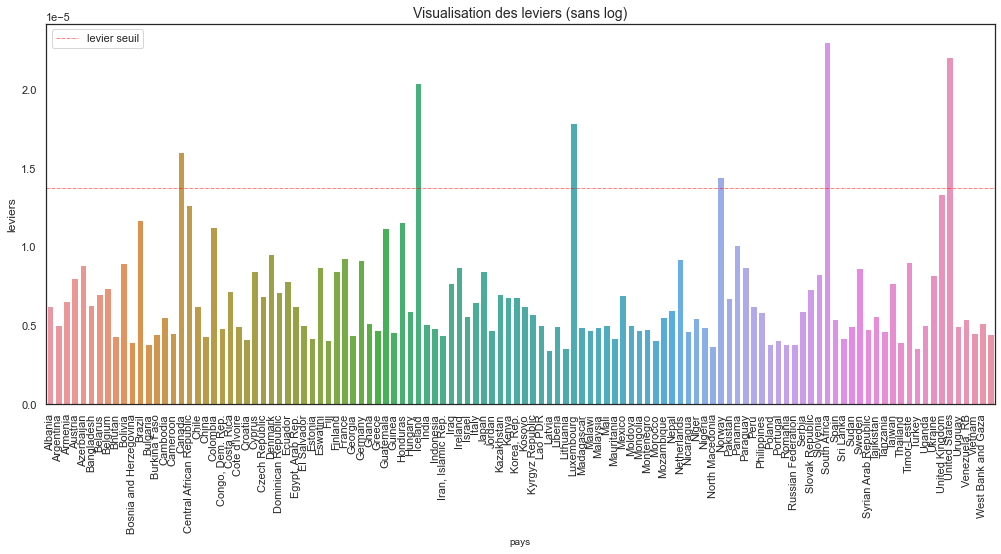

In [211]:
# Visualisation par barplot des leviers
sns.set_style("white")
fig = plt.figure(figsize=(17,7))
sns.barplot(x='country', y= 'levier', data=vis_data_sans_log)
plt.xticks(np.arange(0, 115, step=1), rotation=90)
plt.xlabel('pays', size=10)
plt.ylabel('leviers', size=12)
plt.axhline(y=seuil_levier, c='red',linestyle='dashdot', lw=0.5, label='levier seuil') 
# plt.plot([0, 115], [seuil_levier_ln, seuil_levier_ln], color='r')
plt.title("Visualisation des leviers (sans log)", size=14)
plt.legend(loc='upper left')
# plt.savefig("Visualisation des leviers.jpg")
plt.show()

#### Visualisation des résidus (sans log) <a class="anchor" id="vis_res_stud_ss_log"></a>

In [212]:
vis_data_sans_log

,country,obs,levier,rstudent,dcooks
0,Albania,2500.5,0.000006,-0.009212,1.672675e-07
1,Argentina,7500.5,0.000005,-0.001461,9.588012e-07
2,Armenia,12500.5,0.000007,-0.005737,9.373527e-08
3,Austria,17500.5,0.000008,-0.015430,3.906456e-06
4,Azerbaijan,22500.5,0.000009,0.000775,1.817004e-07
...,...,...,...,...,...
111,Uruguay,557500.5,0.000005,0.005411,1.095076e-06
112,"Venezuela, RB",562500.5,0.000005,-0.001040,3.049504e-07
113,Vietnam,567500.5,0.000005,-0.001108,8.003819e-08
114,West Bank and Gaza,572500.5,0.000005,0.000489,6.298350e-08


<AxesSubplot:xlabel='country', ylabel='rstudent'>

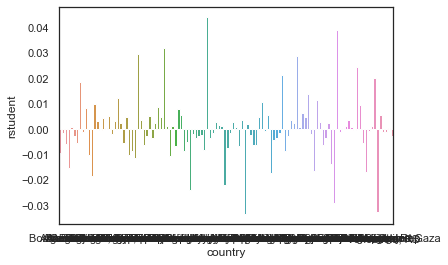

In [213]:
sns.barplot(x='country', y='rstudent', data=vis_data_sans_log)

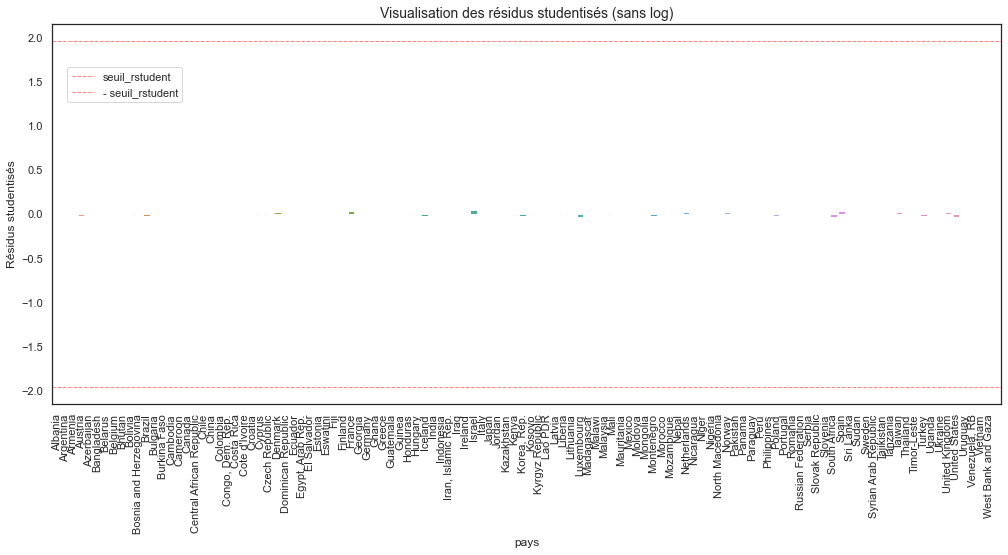

In [214]:
# sns.set_style("white")
fig = plt.figure(figsize=(17,7))
sns.barplot(x='country', y='rstudent', data=vis_data_sans_log)
plt.xticks(np.arange(0, 115, step=1), rotation=90)
plt.xlabel('pays', size=12)
plt.ylabel('Résidus studentisés', size=12)
plt.axhline(y=seuil_rstudent, c='red',linestyle='dashdot', lw=0.5, label='seuil_rstudent') 
plt.axhline(y=-seuil_rstudent, c='red',linestyle='dashdot', lw=0.5, label='- seuil_rstudent')
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 0.9))
plt.title("Visualisation des résidus studentisés (sans log)", size=14)
# plt.savefig("Visualisation des résidus studentisés.jpg")
plt.show()

#### Visualisation de la distance de Cook <a class="anchor" id="vis_dcook_ss_log"></a>

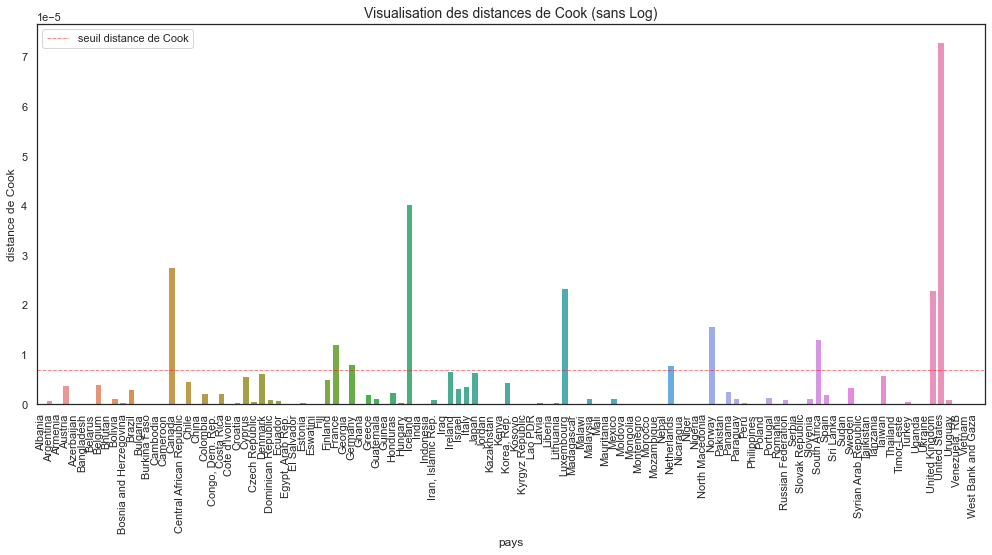

In [215]:
sns.set_style("white")
fig = plt.figure(figsize=(17,7))
sns.barplot(x='country', y='dcooks', data=vis_data_sans_log)
plt.xticks(np.arange(0, 115, step=1), rotation=90)
plt.xlabel('pays', size=12)
plt.ylabel('distance de Cook', size=12)
plt.title("Visualisation des distances de Cook (sans Log)", size=14)
plt.axhline(y=seuil_dcook, c='red',linestyle='dashdot', lw=0.5, label='seuil distance de Cook')
plt.legend(loc='upper left')
# plt.savefig("Visualisation des distances de Cook.jpg")
plt.show()

#### Visualisation des coefficients du modèle avec Log <a class="anchor" id="vis_import_coef"></a>

In [216]:
ln_res_mj_gj_c_i_parent.params

Intercept    -0.073882
ln_mj         0.987464
Gj           -0.017638
c_i_parent    0.011351
dtype: float64

In [217]:
importance = ln_res_mj_gj_c_i_parent.params
importance

Intercept    -0.073882
ln_mj         0.987464
Gj           -0.017638
c_i_parent    0.011351
dtype: float64

In [218]:
importance = importance[1:]
importance

ln_mj         0.987464
Gj           -0.017638
c_i_parent    0.011351
dtype: float64

In [219]:
dd = df_sample_pays_ind[['ln_mj', 'Gj', 'c_i_parent']]

ln_mj, Score: 0.98746
Gj, Score: -0.01764
c_i_parent, Score: 0.01135


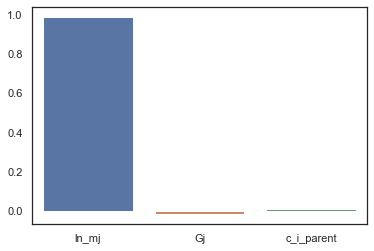

In [220]:
for i,imp in enumerate(importance):
    print('%s, Score: %.5f' % (dd.columns[i],imp))
sns.barplot(x= importance.index, y= importance.values)
plt.savefig("coefficient_importance.jpg")
# plt.show()